In [1]:
import math 
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator
from skimage import io
import cv2
import sys

In [2]:
img=Image.open('Q2_train/Car/7.jpg')

In [3]:
shape(img)

(326, 647, 3)

In [4]:
image=np.asarray(img.resize((256,256)))

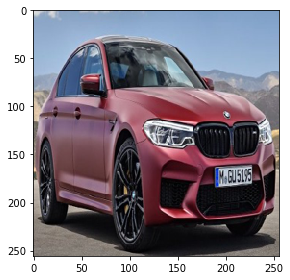

In [5]:
io.imshow(image)

In [6]:
shape(image)

(256, 256, 3)

In [7]:
grayImage=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

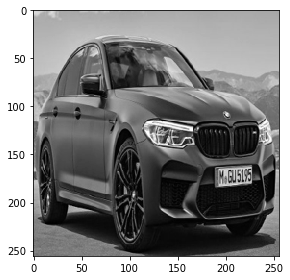

In [8]:
io.imshow(grayImage)

In [9]:
shape(grayImage)

(256, 256)

In [10]:
rows=256
columns=256

In [11]:
gradient=[[0 for c in range(columns)] for r in range(rows)]
for r in range(rows):
    for c in range(columns):
        h_edge=0
        v_edge=0
        if c==0:
            h_edge=255-grayImage[r][c+1]
        elif c==columns-1:
            h_edge=255-grayImage[r][c-1]
        else:
            h_edge=abs(grayImage[r][c-1]-grayImage[r][c+1])
        
        if r==0:
            v_edge=255-grayImage[r+1][c]
        elif r==rows-1:
            v_edge=255-grayImage[r-1][c]
        else:
            v_edge=abs(grayImage[r-1][c]-grayImage[r+1][c])
        magnitude=sqrt(pow(h_edge,2)+pow(v_edge,2)) 
        angle=0
        if h_edge==0:
            angle=90
        else:
            angle=np.degrees(math.atan(v_edge/h_edge))
        gradient[r][c]=(magnitude,angle)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


In [12]:
gradient[1][7]

(10.295630140987, 60.945395256565384)

In [13]:
grayImage[1][7]

209

In [14]:
histogram=[[0 for j in range(16)]for i in range(16)]
i=0
while i<256:
    j=0
    while j<256:
        arr=[0 for m in range(9)]
        for r in range(i,i+16):
            for c in range(j,j+16):
                mag=gradient[r][c][0]
                ang=gradient[r][c][1]
                print(mag,ang)
                ang%=180
                if ang%20==0:
                    ind=int(ang/20)
                    arr[ind]+=mag
                else:
                    ind=int(ang/20)
                    if ind==8:
                        val1=(180-ang)/20
                        val2=(ang-160)/20
                        arr[8]+=mag*val1
                        arr[0]+=mag*val2
                    else:
                        angle1=20*ind
                        angle2=angle1+20
                        val1=(angle2-ang)/20
                        val2=(ang-angle1)/20
                        arr[ind]+=mag*val1
                        arr[ind+1]+=mag*val2
        histogram[int(i/16)][int(j/16)]=arr          
        j+=16
    i+=16

56.639209034025185 42.13759477388825
37.013511046643494 88.45184230102204
37.05401462729781 86.9059419410829
258.11818998280614 8.914926957147866
42.01190307520001 88.63607246839707
45.09988913511872 86.18592516570965
43.01162633521314 88.66778014613037
46.010868281309364 88.75463573323165
48.041648597857254 87.61405596961119
55.226805085936306 84.8055710922652
62.51399843235114 82.64762064010765
70.45565981523414 83.48019824834302
71.11258679024411 86.7754773934801
69.2314957226839 79.17698877379291
79.51100552753688 83.50065372034544
261.23169792351007 17.602623170032782
253.71243564319033 81.61439976520288
356.4070706369333 44.31793964796141
249.0180716333656 89.30972280213493
248.05039810490126 88.84499959643279
252.04959829366916 88.86332815680537
250.00199999200007 89.7708181042459
252.00198411917316 89.77263698900944
10.295630140987 60.945395256565384
18.35755975068582 60.64224663961734
26.076809620810597 57.528807146665336
30.01666203960727 60.01836085857095
27.51363298439521 7

255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0 90
255.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0 90
255.0 0.0
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
255.0 90
360.62445840513925 45.0
359.9180462271932 44.88743476940123
360.62445840513925 45.0
359.21302871694394 44.774427243863926
253.0 90
253.0 90
253.0 90
253.0 90
253.0 90
253.0 90
253.0 90
253.0 90
255.0019607767752 89.7753118203755
239.70398411373975 18.73729841489868
246.9817807045694 15.49927537650084
260.48608408128064 13.76950526688913
259.5149321330085 13.822054635731693
259.2778432492835 13.607471082984857
262.1945842308723 13.453235306455399
62.0 90
63.198101237299845 85.46222749209335
65.92419889539804 80.39479584498706
75.95393340703298 80.90972307917768
265.70660511172844 17.071021291319095
258.80494585691366 16.61442448912639
262.08395601409865 15.945395900

0.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0 90
255.00784301664135 89.55063055129204
2.0 0.0
0.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
254.0019684963091 89.77442723036594
1.0 0.0
1.0 0.0
0.0 90
360.62445840513925 45.0
255.0 90
254.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
254.0019684963091 89.77442723036594
253.00197627686626 89.77353564765882
254.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
360.62445840513925 45.0
255.0019607767752 89.7753118203755
255.00784301664135 89.55063055129204
255.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
254.0 90
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
359.21302871694394 44.774427243863926
253.0 90
253.00790501484337 89.54707837103881
254.0019684963091 89.77442723036594
359.9180462271932 44.88743476940123
359.9180462271932 44.8

254.0 90
254.0 90
254.0 90
0.0 90
0.0 90
0.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0 90
255.0 90
253.0 90
253.0 90
253.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
254.0 90
254.0019684963091 89.77442723036594
253.00197627686626 89.77353564765882
253.0 90
359.21302871694394 44.774427243863926
359.21302871694394 44.774427243863926
253.0 90
253.00197627686626 89.77353564765882
253.00197627686626 89.77353564765882
253.0 90
253.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0 90
255.0 90
253.0 90
253.0 90
253.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0 90
254.0019684963091 89.774

255.0 90
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
254.0 90
254.0 90
255.0 90
359.9180462271932 44.88743476940123
0.0 90
255.0 90
255.0 90
255.0 90
0.0 90
0.0 90
0.0 90
255.0 0.0
359.9180462271932 44.88743476940123
254.0 90
254.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
255.0 90
360.62445840513925 45.0
253.0 90
360.62445840513925 45.0
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
0.0 90
0.0 90
255.0 0.0
255.0 0.0
0.0 90
255.0 0.0
359.9180462271932 44.88743476940123
254.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
360.62445840513925 45.0
253.00790501484337 89.54707837103881
255.00784301664135 89.55063055129204
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0 90
254.0 90
359.9180462271932 44.88743476940123
360.62445840513925 45.0
255.0 90
359.9180462271932 45.11256518375165
254.0 0.

255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0 90
268.16412884649577 71.29479007058386
1.0 0.0
1.0 0.0
0.0 90
255.0 0.0
255.0 0.0
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
255.0 90
255.0 90
268.79360111431225 71.56505117707799
255.0019607767752 89.7753118203755
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
268.79360111431225 71.56505117707799
255.0 90
0.0 90
0.0 90
0.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
268.47904946196456 71.76750891929619
1.0 0.0
1.4142135623730951 45.0
1.0 90
255.0019607767752 0.2246881929121966
255.0 0.0
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
84.0 0.0
255.00784301664135 89.55063055129204
254.0019684963091 89.77442723036594
254.0 90
359.9180462271932 44.88743476940123
255.0 0.0
0.0 90
0.0 90
0.0 90
0.0 90

360.62445840513925 45.0
359.21024484276614 45.0
359.21302871694394 44.774427243863926
253.0 90
253.00197627686626 89.77353564765882
254.0019684963091 89.77442723036594
254.0 90
254.0 90
254.0 90
359.9180462271932 44.88743476940123
360.62445840513925 45.0
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
254.0 90
254.0 90
254.0 90
359.9180462271932 44.88743476940123
359.21024484276614 45.0
359.21024484276614 45.0
253.0 90
254.00787389370433 89.54886145321272
253.00197627686626 89.77353564765882
253.0 90
253.0 90
253.0 90
359.9180462271932 44.88743476940123
360.62445840513925 45.0
359.21024484276614 45.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
359.9180462271932 44.88743476940123
359.9180462271932 45.11256518375165
359.9180462271932 45.11256518375165
255.0 90
255.0019607767752 89.7753118203755
253.0 90
253.0 90
253.0 90
253.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
360.62

251.04979585731593 88.85880076175222
357.08962460424414 45.11345640889458
255.01764644824092 0.6740369111659504
11.313708498984761 45.0
17.88854381999832 63.43494882292202
18.027756377319946 70.5599646674406
21.37755832643195 79.2157021324374
20.12461179749811 63.43494882292202
252.00198411917316 89.77263698900944
356.39304145844375 44.54528135684538
0.0 90
2.0 0.0
4.0 90
5.0990195135927845 11.309932638207453
253.00197627686626 89.77353564765882
354.27813931994166 45.57179464364486
360.62445840513925 45.0
12.806248474865697 38.659808670565035
21.095023109728988 58.57043421632536
17.804493814764857 51.8427729386115
15.264337522473747 58.3924977537511
15.811388300841896 71.56505117707799
15.231546211727817 66.8014087797805
9.848857801796104 66.03751102542182
359.21302871694394 44.774427243863926
254.0019684963091 89.77442723036594
253.0 90
359.21024484276614 45.0
254.0 90
359.21302871694394 44.774427243863926
359.9180462271932 44.88743476940123
254.0 90
254.00787389370433 89.548861453212

185.00270268296083 89.69029610004117
326.1180767758819 39.400661537410706
325.3459696999488 39.51244276174953
203.0 90
214.00934559032697 89.46454101443547
340.50697496527147 42.26236990659173
344.48367160142726 43.47090741797446
347.1959101141602 44.649928058412186
350.0185709358862 44.88425121855332
355.6810368855781 45.34171928044501
246.03251817595168 0.9315565633804126
251.16130275183716 2.0535506246591657
14.0 90
250.88044961694405 4.801573285441594
255.43100829773977 6.06771071217008
31.78049716414141 77.27564374652228
39.05124837953327 87.06432655357884
253.0 90
253.0 90
253.0 90
253.0 90
253.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
253.0 90
254.0019684963091 89.77442723036594
255.0 90
359.9180462271932 45.11256518375165
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
360.62445840513925 45.0
254.0 90
255.0019607767752 89.7753118203755
255.0 90
255.

254.0 90
254.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
254.0019684963091 89.77442723036594
254.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
254.0 90
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
254.0 90
254.0019684963091 89.77442723036594
252.00198411917316 89.77263698900944
252.0 90
252.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
254.0 90
254.0 90
0.0 90
0.0 90
255.0 0.0
360.62445840513925 45.0
255.0 90
255.00784301664135 89.55063055129204
255.00784301664135 89.55063055129204
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0 90
255.0 90
1.0 90
1.0 90
1.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203

255.0 0.0
0.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.00784301664135 89.55063055129204
254.0019684963091 89.77442723036594
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
359.9180462271932 44.88743476940123
0.0 90
255.0019607767752 89.7753118203755
360.62445840513925 45.0
255.0 0.0
0.0 90
255.0 90
254.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
1.0 0.0
255.0 90
255.0 90
0.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
1.0 0.0
255.0019607767752 89.7753118203755
255.0 90
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0 90
254.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203

255.0 90
255.0 90
255.0 90
255.0 90
1.0 0.0
1.0 0.0
0.0 90
0.0 90
0.0 90
255.0019607767752 89.7753118203755
1.0 0.0
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0 90
254.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
255.0 90
254.0 90
254.0 90
254.0019684963091 89.77442723036594
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
254.00787389370433 89.54886145321272
254.0019684963091 89.77442723036594
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
1.0 90
0.0 90
0.0 90
0.0 90
255.0019607767752 89.7753118203755
1.0 0.0
255.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
255.0019607767752 0.2246881929121966
255.0019607767752 0.2246881929121966
1.0 90
1.0 90
1.0 0.0
255.0019607767752 89.7753118203755
0.0 90
255.0 90
255

255.0 0.0
0.0 90
255.0 90
255.0 90
360.62445840513925 45.0
359.9180462271932 45.11256518375165
255.0 0.0
0.0 90
1.0 0.0
1.0 0.0
0.0 90
0.0 90
263.65507770570247 75.27855908502193
255.0 90
255.0 90
255.0 90
0.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0 90
1.0 90
255.00784301664135 0.4493694752821258
255.0019607767752 0.2246881929121966
1.0 0.0
254.0019684963091 89.77442723036594
254.0 90
254.0 90
263.40273347101015 75.48894049983095
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
360.62445840513925 45.0
360.62445840513925 45.0
0.0 90
0.0 90
1.0 0.0
1.4142135623730951 45.0
255.0019607767752 0.2246881929121966
254.0019684963091 0.22557276879373642
254.0 0.0
359.9180462271932 44.88743476940123
254.0 90
254.0019684963091 89.77442723036594
255.0 0.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 0.0
255.0 90
255.0 90
360.62445840513925 45.0
255.0 0.0
255.0 0.0
0.0 90
0.0 90
0.0 90
360.62445840513925 45.0
255.0 0.0
255.0 0.0
255.0 90
255.0 0.0
255.0 90
255.0 90
36

251.91466809219347 7.068595002648261
358.50383540486706 45.113010799802524
357.79603128039304 45.0
357.7988261579403 44.773535756071134
255.03137061938085 89.10131637926202
359.21302871694394 44.774427243863926
360.62445840513925 45.0
107.16809226630845 40.0793830370853
177.51901306620653 43.85880074441286
33.61547262794322 30.379126712520502
40.311288741492746 43.994913446229084
18.439088914585774 77.47119229084849
232.72515979154468 46.5669703113705
315.32998588779975 48.72861120440027
55.14526271584895 85.84035770628736
244.55878638887626 11.080199608067158
217.9380645963435 7.646761702953686
251.0 0.0
3.0 0.0
4.47213595499958 26.565051177077994
5.0990195135927845 11.309932638207453
2.23606797749979 26.565051177077994
353.62409420173844 46.14576230290238
249.0 0.0
10.0 53.130103173778664
24.839484696748443 49.899092453787766
27.459060435491963 56.88865749611159
31.400636936215164 80.8376526771915
38.118237105091836 85.48601165481672
41.0 77.31961709327668
45.5411901469428 81.1581851

243.03291958086666 0.9430552039317838
350.8275929855005 46.385917743376005
350.86464626690446 46.6167902170748
244.59149617270018 3.9854785503726395
249.24285345822858 2.5294941107291433
246.01829200285087 0.6986943569576576
5.385164807134504 68.19859051364818
246.48326515201796 83.71114835030444
41.97618372363071 12.380756889074236
14.422205101855956 56.309932474020215
19.924858845171276 72.47443203918529
21.633307652783937 56.309932474020215
15.231546211727817 66.8014087797805
15.132745950421556 82.40535663140857
253.33377192944488 2.9414649518396963
247.12952069714376 1.855085300109504
240.00833318866242 0.4774538022095795
237.21087664776252 2.4161103818748084
249.20072231034965 2.2997993362097744
15.0 90
254.23217734976035 5.643318135158388
40.11234224026316 85.71084656930122
50.21951811795888 77.34744361860473
53.0 58.109207381157624
62.42595614005443 35.21759363859234
28.442925306655784 79.87532817574707
25.019992006393608 87.70938995736148
15.0 90
7.0710678118654755 81.869897645

1.0 90
357.0952253951318 44.65963319974248
355.0126758300329 44.08699718846167
349.3136126749142 45.23196523097675
345.0797009387831 44.53037343183243
230.07824755939012 88.50566635918698
241.3503677229434 86.91234873940428
360.62445840513925 45.0
238.20999139414786 87.59402940631888
214.34784813475503 83.57125225117015
214.3361845326169 86.79051379639142
214.00934559032697 89.46454101443547
318.45407832213425 40.54274965446568
313.69411852950003 40.08620030475929
227.00881040171106 89.49520443144418
243.0514348857048 88.82124079309008
358.50383540486706 44.88699077349252
249.00803199896987 0.46019715083575063
352.8809997718778 44.19630386194843
347.1901496298534 45.11669111819016
340.1543767173958 45.83376814066415
245.05101509685693 88.83086067209258
251.87695408671274 85.21746758787383
249.07227866625382 88.61964592655556
357.7988261579403 44.773535756071134
240.03333101883996 89.04515874612783
235.07658326596462 88.53744682836405
339.7675676105652 42.3757798905399
326.7598506548808

255.0019607767752 89.7753118203755
255.0 90
255.0 90
254.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
255.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
0.0 90
254.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0 90
0.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0019684963091 89.77442723036594
255.00784301664135 89.55063055129204
254.0019684963091 89.77442723036594
255.0 90
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
360

0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
1.0 90
1.4142135623730951 45.0
255.0019607767752 89.7753118203755
255.0 90
255.0 90
360.62445840513925 45.0
255.0 0.0
0.0 90
1.0 0.0
1.0 0.0
0.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 0.0
359.9180462271932 44.88743476940123
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0019684963091 89.77442723036594
255.0 90
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
255.0019607767752 89.7753118203755
254.0 90
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.775311820

255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
266.0845730214362 73.40387980784162
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
265.80067720004024 73.61045966596522
1.0 0.0
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
265.80067720004024 73.61045966596522
255.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0 90
254.0 90
254.0 90
264.5600120955546 73.75712089730241
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 0.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
265.24328455212583 74.02493254320

254.0 90
253.0 90
253.0 90
253.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 0.0
255.0 0.0
255.0 0.0
359.9180462271932 44.88743476940123
359.21024484276614 45.0
51.97114584074513 11.09372318888736
157.74663229368798 39.34051735615668
113.46365056704283 22.2702681846628
360.62445840513925 45.0
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0 90
255.0 90
0.0 90
255.0 0.0
254.0 0.0
359.9180462271932 45.11256518375165
253.0 0.0
253.16002844051033 87.9626692724874
119.20151005754919 30.221839455339605
149.21796138535066 30.173519139290246
80.45495634204272 32.30733474189145
359.9180462271932 45.11256518375165
255.0 90
255.0 90
254.0 90
253.0 90
255.0 90
255.0 90
255.0 90
359.21302871694394 44.774427243863926
359.9180462271932 45.11256518375165
359.9180462271932 44.88743476940123
253.00197627686626 0.22646436141027848
60.166435825965294 15.422161264021685
163.835283135227 38.05901712928606
114.23659658795863 23.198590719731484
253.78928267363852 4.51991108

9.433981132056603 57.99461717563499
14.035668847618199 85.91438322002513
242.3489220112192 3.074916828598601
340.96920682079195 46.66372651649755
330.9380606699689 44.5103037004027
245.17748673155128 84.38241958440022
196.65197685250968 85.333141628561
215.1278689523977 5.869600364057248
246.0995733437992 88.37007208935434
251.7717220022932 76.68129576773224
260.0999807766237 77.56676445006141
246.01829200285087 74.43848931716569
12.36931687685298 14.036243467926479
232.07757323791543 1.4814572186958623
357.08962460424414 44.88654334211015
5.385164807134504 68.19859051364818
5.0 90
357.0952253951318 45.34036612997051
344.0058139043583 47.59186531264747
336.04315199093105 46.80873890515042
345.0710071854777 44.76518231432501
255.0019607767752 0.2246881929121966
217.329243315298 83.6598082540901
243.46252278328177 3.5322946101418986
353.5533905932738 45.0
254.691970819655 76.83676795000682
252.62224763468478 77.88940259537797
248.4854120466632 74.11794938442665
251.05577069647293 84.7435

240.0 0.0
248.0020161208372 0.2310301100103164
249.0321264415497 0.9203349325698049
218.08255317654368 11.103833813115079
219.85677155821242 10.747726434109262
254.37177516383377 11.795853037763354
203.8872237291979 84.652918524573
213.283848427395 87.04368928964459
223.0201784592596 89.22925128097411
344.0058139043583 42.40813272302379
242.10121850168372 88.34314613078585
243.90571949013415 85.06078434214291
246.6576574931336 85.81508397187835
248.03225596683993 89.07595464722729
352.15053599277684 44.5398028181968
350.1385440079398 43.49560890097026
353.5647041207592 44.54164356953713
249.0321264415497 0.9203349325698049
359.9180462271932 45.11256518375165
238.0021008310641 0.2407371650528746
242.98559628093184 7.329748124499936
40.11234224026316 85.71084656930122
205.9732992404598 84.42780219603621
200.90047287151916 84.57318744998204
192.75113488641253 84.94013127874675
208.06249061279644 84.20720326640821
246.07722365143832 84.63693062146184
241.91320757660174 85.02000044290408
23

208.47062143141417 3.8506390200468807
341.40005858230313 48.32464860161799
244.20483205702544 87.6531256708627
244.16592718886884 87.88758869677537
248.12899870833317 88.15238973400541
13.892443989449804 59.74356308419781
39.20459156782532 5.856013661252056
250.64716236175505 85.88181042125599
246.07315985291854 88.60281897270363
2.23606797749979 26.565051177077994
248.2438317461282 2.5396803747514247
242.52834885843757 3.7826452885277027
230.62740513651016 4.227218765007774
225.5681715136247 4.067519664742052
347.4492768736179 47.21604250824159
347.8965363437814 45.0
338.7535977668724 48.82998460769157
220.27482833950864 2.8624052686939745
246.0 90
248.20153101864622 87.69093714001592
246.20316813558676 87.67218494701633
237.30571000294114 10.931122593888853
245.17748673155128 84.38241958440022
248.03225596683993 89.07595464722729
246.01829200285087 89.30130561701652
234.48027635602958 86.33221203391285
248.07257002740147 88.6140821065685
243.0514348857048 1.1787592142500394
231.0 0.0

359.21302871694394 44.774427243863926
359.9180462271932 44.88743476940123
254.0 90
254.0 90
255.0 90
255.0 90
255.0 90
0.0 90
0.0 90
253.0 90
254.0 90
254.0019684963091 89.77442723036594
254.0019684963091 89.77442723036594
254.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
1.0 0.0
255.0019607767752 89.7753118203755
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
0.0 90
254.0 90
254.0 90
254.0 90
255.0 90
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
0.0 90
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.0019684963091 89.77442723036594
255.0019607767752 89.77531182

255.0 90
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
254.0 90
254.0 90
255.0 90
255.0 90
255.0 90
255.0 90
255.0 90
254.0019684963091 89.77442723036594
255.0 90
255.0 90
255.0 90
255.0 90
0.0 90
0.0 90
1.0 0.0
1.0 0.0
0.0 90
0.0 90
255.0 90
255.0 90
255.0 90
0.0 90
0.0 90
0.0 90
255.0019607767752 89.7753118203755
1.0 0.0
0.0 90
0.0 90
0.0 90
0.0 90
1.0 0.0
254.0019684963091 89.77442723036594
254.0 90
359.9180462271932 44.88743476940123
360.62445840513925 45.0
255.0 90
255.0019607767752 89.7753118203755
1.0 0.0
255.0 90
255.0 90
1.0 0.0
255.0019607767752 89.7753118203755
255.0 90
255.0 90
0.0 90
0.0 90
255.0 0.0
360.62445840513925 45.0
254.0 90
254.0019684963091 89.77442723036594
1.0 0.0
0.0 90
1.0 0.0
0.0 90
360.62445840513925 45.0
255.0 90
0.0 90
255.0 90
255.0 90
1.0 0.0
1.0 0.0
0.0 90
0.0 90
255.0019607767752 0.2246881929121966
255.0 0.0
1.0 0.0
1.0 0.0
0.0 90
1.0 0.0
0.0 90
255.0 0.0
0.0 90
255.0 90
0.0 90
1.4142135623730951 45.0
1.0 0.0
0.0 90
255.0 90
25

17.029386365926403 86.63353933657021
21.587033144922902 76.60750165996654
25.709920264364882 76.50426622321464
24.515301344262525 78.23171152256764
22.090722034374522 84.8055710922652
23.021728866442675 87.51044707800085
23.769728648009426 75.37912572123642
66.49060083951716 12.154941697222231
15.132745950421556 82.40535663140857
15.033296378372908 86.18592516570965
17.46424919657298 76.7594800848128
22.360679774997898 63.43494882292202
22.825424421026653 61.18920697806418
18.439088914585774 77.47119229084849
254.78618486880328 4.502189475337965
253.87004549572208 4.744899235620076
21.095023109728988 84.55966796899449
18.973665961010276 71.56505117707799
18.439088914585774 77.47119229084849
14.0 90
12.0 90
11.045361017187261 84.8055710922652
10.04987562112089 84.28940686250036
81.9084855189009 17.77132082290876
22.20360331117452 82.23483414782675
21.02379604162864 87.27368900609373
18.24828759089466 80.53767779197439
18.027756377319946 70.5599646674406
12.36931687685298 75.963756532073

248.0080643850115 0.4620527076611178
5.0 0.0
255.0019607767752 89.7753118203755
0.0 90
1.0 0.0
2.0 0.0
2.0 0.0
255.00784301664135 89.55063055129204
255.00784301664135 89.55063055129204
255.0 90
356.39304145844375 45.45471977585525
255.1960031034969 87.75425743410493
17.08800749063506 20.556045219583467
3.605551275463989 33.69006831407853
254.0019684963091 0.22557276879373642
353.62409420173844 46.14576230290238
251.0019920239678 0.22826883695629027
255.00784301664135 89.55063055129204
254.0019684963091 89.77442723036594
255.0019607767752 89.7753118203755
255.0019607767752 89.7753118203755
255.00784301664135 89.55063055129204
255.0019607767752 89.7753118203755
254.0019684963091 89.77442723036594
254.00787389370433 89.54886145321272
254.0019684963091 89.77442723036594
358.50941410233565 45.339023038858784
14.142135623730951 8.130102712740909
4.242640687119285 45.0
251.04979585731593 88.85880076175222
7.0710678118654755 81.86989764584403
350.1042701824701 46.27302883337032
355.70915085220

211.15160430363773 2.171311871725065
210.15232570685484 2.1816414867752583
235.03404008781365 0.9751531122203326
254.03149411047443 89.09777883846985
253.00790501484337 89.54707837103881
352.15053599277684 45.460197494479466
248.0 0.0
251.04979585731593 1.1411992895885308
13.038404810405298 4.398705518216965
251.9622987670973 84.99086046466346
251.01792764661252 89.31522247217835
357.79603128039304 45.0
243.0740627874558 1.4144232219361483
241.0186714758838 0.71318864586521
233.05364189387817 1.2293344841887806
231.26175645791503 2.7263110446111485
219.44703233354514 3.6577667535123455
201.12185361118767 1.994569201543449
230.17601960239037 2.240865476975229
3.0 90
2.0 0.0
358.50383540486706 44.88699077349252
248.0020161208372 0.2310301100103164
352.8639964632266 45.57408720113509
9.219544457292887 12.528807799551075
252.7152547829276 85.6882380817616
252.1269521491108 88.18169703554817
252.00793638296395 89.54528113830686
353.62409420173844 46.14576230290238
241.07467722678797 1.42615

248.05039810490126 88.84499959643279
223.78784596130328 10.556744815726672
219.92044015961773 16.374837590614387
213.7755832643195 10.784298063725036
199.06029237394384 11.592175557344827
201.52667317256046 16.726475571324272
228.1074308302998 1.758528573532942
246.05080776132397 1.1643879967589832
255.64232826353307 80.3166018185013
5.0 53.130103173778664
3.0 90
6.082762530298219 9.462322484925178
9.0 90
218.8172753691993 9.204040553909195
201.79197209007103 13.760785243295864
246.05080776132397 88.8356119779272
224.8777445635739 82.59056139370112
250.09798079952586 88.39613727776552
242.7447218787671 4.4892201496573705
204.68756679388224 16.752867135310158
210.2974084481309 8.476878352956616
186.96791168540125 16.787301080438315
191.0026177831079 18.6246696603909
252.00198411917316 0.22736302411881923
244.72433471152803 75.56626952780195
252.1606630701942 87.95459151111278
8.0 0.0
6.324555320336759 18.434949335186197
4.0 90
249.0 0.0
208.48261318392957 11.902812263297667
211.09239683

227.7740108089595 15.012435578067434
217.26711670199887 17.684392722924503
235.8495283014151 15.745177886558686
252.12100269513448 70.0557241290034
213.70072531463248 58.3924977537511
23.194827009486403 7.4314078981732745
254.0019684963091 0.22557276879373642
249.0020080240318 0.23010228652532752
5.385164807134504 68.19859051364818
13.341664064126334 77.00538366854566
233.94443784796422 5.150082434340402
221.90313201935658 5.171052534873823
243.39268682522078 6.132222295390869
251.03187048659777 89.08699713318458
250.04999500099976 88.8542371618249
7.0 90
249.15858403835898 5.527539987942875
253.56853117056934 8.16205784988372
41.30375285612676 83.04704237168096
36.40054944640259 69.07549798702613
18.973665961010276 71.56505117707799
255.1960031034969 2.245742645291104
2.23606797749979 63.43494882292202
254.0 90
359.9180462271932 45.11256518375165
357.79603128039304 45.0
359.21302871694394 44.774427243863926
253.00197627686626 89.77353564765882
254.0 90
254.0 90
4.123105625617661 14.03

12.36931687685298 75.96375653207353
353.598642531331 44.083346187627264
7.0 0.0
11.180339887498949 79.69515353123397
5.385164807134504 68.19859051364818
8.246211251235321 14.036243467926479
7.810249675906654 39.8055704204433
3.1622776601683795 18.434949335186197
2.0 90
358.50383540486706 45.113010799802524
252.00198411917316 0.22736302411881923
2.23606797749979 26.565051177077994
2.0 0.0
255.0 90
2.23606797749979 26.565051177077994
246.34325645326686 3.0250120079315104
250.04999500099976 1.1457628125721353
10.04987562112089 84.28940686250036
26.40075756488817 24.623565256535322
13.45362404707371 48.012788862673965
251.2866888635369 2.737156386510244
255.00784301664135 0.4493694752821258
251.0019920239678 89.77173116984659
249.00803199896987 89.53980283202131
252.00793638296395 89.54528113830686
254.0019684963091 89.77442723036594
1.4142135623730951 45.0
4.0 90
254.0 0.0
255.00784301664135 89.55063055129204
6.0 0.0
2.0 0.0
3.0 0.0
1.0 0.0
2.0 0.0
254.0019684963091 89.77442723036594
359.

29.546573405388315 23.962489133010408
262.50523804297694 74.53430637647111
5.0 53.130103173778664
245.52189311749777 86.2635406418217
240.14162487998618 82.34229030628613
235.1871595134394 82.17997400263573
341.0630440255877 42.86131660029655
344.570747452537 46.99924472077393
355.0126758300329 44.08699718846167
242.1672975444868 87.87014683127695
243.20567427590993 87.64347858030709
351.43847256667846 45.3458458212421
230.17601960239037 2.240865476975229
337.34255586866 48.84603091615214
318.1980515339464 45.0
248.65236777477105 85.84871470176272
83.7615663654877 33.31063164231435
257.84685377176896 73.3220394869862
249.0180716333656 89.30972280213493
249.1625975141534 87.92996929943077
246.07722365143832 84.63693062146184
245.7356303021603 85.56552963143909
242.03305559365234 89.05304855322653
354.9929576766277 45.6847768618213
348.61009738675097 45.348652739855
240.13329631685815 88.09084756700362
254.4366325826531 83.90848599488747
11.661903789690601 30.963757536513096
222.18235753

150.00333329629711 89.61803379527097
146.16771189288008 87.25504417777255
144.12494579357175 87.61405596961119
5.830951894845301 59.036242865262714
255.00784301664135 0.4493694752821258
1.0 0.0
4.242640687119285 45.0
5.385164807134504 21.80140978075652
5.0990195135927845 11.309932638207453
3.0 0.0
255.01764644824092 89.32596310201549
359.21302871694394 44.774427243863926
359.9180462271932 44.88743476940123
4.123105625617661 14.036243467926479
254.00787389370433 89.54886145321272
254.00787389370433 0.4511385451067286
4.0 90
1.4142135623730951 45.0
356.39304145844375 44.54528135684538
254.01771591761076 89.32330963939683
255.00784301664135 89.55063055129204
4.47213595499958 26.565051177077994
254.0019684963091 89.77442723036594
1.0 0.0
254.03149411047443 89.09777883846985
4.0 0.0
255.03137061938085 89.10131637926202
251.00796800101784 89.54346958590095
3.0 0.0
1.4142135623730951 45.0
0.0 90
4.0 0.0
2.0 90
253.0 0.0
255.0019607767752 89.7753118203755
253.00790501484337 89.54707837103881
2

249.07227866625382 88.61964592655556
249.07227866625382 88.61964592655556
254.01771591761076 89.32330963939683
2.23606797749979 26.565051177077994
6.0 0.0
255.07057846799972 88.65211271980141
8.06225774829855 60.25511870305777
254.01771591761076 89.32330963939683
249.0 90
254.0 90
253.04940229133123 88.86781969073589
252.0972034751675 88.40885972880542
252.07141845120006 88.63607246839707
253.03161857759991 89.09421333988936
255.0019607767752 89.7753118203755
253.0177859360879 89.32063526501956
250.04999500099976 88.8542371618249
250.1619475459847 87.93824237210701
251.16130275183716 87.94644946767215
4.0 0.0
253.07113624433742 88.64146150289194
254.09643838511394 88.42138198030896
252.07141845120006 1.3639275569984521
247.1639132235934 2.086777274707766
10.04987562112089 84.28940686250036
12.529964086141668 61.38954085608745
7.211102550927978 33.69006831407853
253.07113624433742 88.64146150289194
254.00787389370433 89.54886145321272
254.04920783186867 88.87227595720897
8.0 0.0
254.031

5.0990195135927845 78.69006752597979
0.0 90
253.03161857759991 89.09421333988936
251.03187048659777 89.08699713318458
255.03137061938085 89.10131637926202
2.0 0.0
255.0019607767752 89.7753118203755
253.03161857759991 89.09421333988936
251.00796800101784 89.54346958590095
7.810249675906654 39.8055704204433
10.44030650891055 73.30075539003266
255.50146770615623 3.590322813912257
252.79240494919938 4.537772662778711
251.3483638299641 5.937416221109395
245.0979396078229 7.501956604016138
241.13274352522097 7.62604672382297
245.66033460858105 4.201936229914621
250.39169315294788 3.205216029741629
253.23901753086943 2.489552968312349
5.656854249492381 45.0
255.12545933324648 88.20307472730403
3.0 0.0
5.0 90
4.123105625617661 75.96375653207353
4.0 90
233.21449354617735 87.54246177145147
234.03418553707064 89.02068034566052
350.86464626690446 43.38320978836246
247.0 90
4.0 0.0
4.47213595499958 63.43494882292202
243.20567427590993 2.356521434354532
239.2091135387613 2.395915442298173
249.072278

224.98222151983475 84.64417511583264
216.8155898453799 82.57998490946184
253.23901753086943 87.51044707800085
230.4886114323222 12.528807799551075
217.846276075585 22.680560040955005
218.52459815773602 17.854548690926165
249.9059823213522 8.746162583337215
248.26195842295292 84.22051424133521
222.32408776378685 86.9059419410829
244.00204917172314 89.76518254620636
3.1622776601683795 18.434949335186197
254.159398803192 2.0293165283776022
251.19912420229494 2.2814938370474303
252.79240494919938 4.537772662778711
254.01771591761076 89.32330963939683
251.00796800101784 89.54346958590095
245.03265088555034 89.06464180424285
233.42022191746798 86.56146909934908
220.10224896624752 84.26350436498903
226.86119103980744 82.65570075668133
12.806248474865697 38.659808670565035
237.11811402758752 11.925992466969229
212.6240814207083 22.10164622166447
200.7436175822285 21.32439742195989
254.48968544913564 9.499335258283029
245.2305038122297 82.26640203590455
227.71253808255707 85.4662087022715
240.1

216.8155898453799 82.57998490946184
222.31509170544405 81.7241071729248
239.88330496305906 82.81573266454679
28.460498941515414 71.56505117707799
252.57276179350774 3.8593442695064795
248.65236777477105 4.151285143136267
248.29015284541592 2.7702157147699316
253.07113624433742 1.3585384857835046
254.12595302329905 1.803995109484626
248.45321491178174 3.461253775051534
246.51977608297474 3.721313126509572
249.06424873915566 5.298565124512381
243.38652386687312 8.030226388577992
237.77510382712484 7.005463342446417
252.1606630701942 2.0454085802464457
243.09051812030842 84.57084102898065
227.1255159597882 82.15530414674174
219.79080963497995 82.68098049772559
212.73457640919588 80.80334435467809
213.88314566603887 80.58171785481923
246.81166909204273 4.647970518995284
250.05999280172747 5.27740588741857
249.68980756130196 6.66961985589712
246.48326515201796 6.288851264342259
248.8875247978492 4.840112557209576
249.57964660604839 3.9056989920238117
250.79872407968904 4.5739211580995525
25

31.144823004794873 5.527539987942875
246.07315985291854 88.60281897270363
230.21728866442677 87.51044707800085
210.40199618824911 86.45763893617416
191.94269978303421 84.31910906931608
190.16045856065872 76.62145993790195
189.4887859478761 77.50398892436573
215.00232556881798 89.7335099239416
345.094190040922 45.704420769913746
352.18461068025107 44.07966477540951
255.01764644824092 0.6740369111659504
354.9676041556469 45.0
355.69228273888655 45.56952198222543
243.01851781294363 0.7073193738136612
247.07286374670934 1.3915266875249916
24.20743687382041 51.709836458088546
10.0 0.0
249.72384747957094 4.363511229736269
252.57276179350774 3.8593442695064795
7.0 90
255.0 90
238.03361107205006 89.03713637436378
206.6204249342257 85.5587588105672
192.7615106809448 82.24822073099979
203.19448811422026 83.78436398383607
216.566387050253 83.10469064624942
214.4574549881631 86.25701167104702
348.0 43.60281905797947
253.00790501484337 0.45292164709853994
248.12899870833317 1.847610210969683
19.0 9

18.439088914585774 40.601294926247554
20.248456731316587 57.09475634401618
16.55294535724685 64.98310582392442
15.620499351813308 50.194430027437924
254.01771591761076 0.676690337758695
350.0185709358862 45.115748974678716
355.6810368855781 45.34171928044501
348.66172717979816 46.045851323776034
334.46225497057213 45.12113271868305
340.898811966249 43.81146076908481
244.73863609981976 85.547428247304
246.48326515201796 83.71114835030444
281.40007107319644 64.98310652189998
348.6387815490411 45.81347519589239
254.07085625864295 1.353191948740532
33.61547262794322 59.62087337210129
33.015148038438355 54.86580587155925
16.401219466856727 52.431406955530974
10.198039027185569 78.69006752597979
6.324555320336759 71.56505117707799
255.09606033806168 1.5724304406375953
251.57503850740042 3.8746733186876563
243.24884377936928 2.591866653517268
225.00888871331284 0.5092824173088372
233.05364189387817 1.2293344841887806
255.01764644824092 0.6740369111659504
250.44959572736389 86.56636950688026
2

11.704699910719626 19.983107070309327
8.602325267042627 35.53767843807336
9.219544457292887 49.39870439073351
64.03124237432849 1.7899106082460694
4.0 0.0
357.0952253951318 45.34036612997051
352.9036695757073 46.03327895542596
7.0710678118654755 45.0
251.24092023394596 87.49063527919259
244.0 90
349.32220084042757 45.46392375116964
350.1785258978626 43.2642955175975
41.78516483155236 21.037511368691632
59.09314681077663 23.962489133010408
34.92849839314596 13.24051996277459
19.924858845171276 17.52556771995161
11.180339887498949 26.565051177077994
6.4031242374328485 38.659808670565035
9.899494936611665 45.0
66.37017402418047 6.054191894114834
4.0 90
357.7988261579403 45.22646349187178
251.07170290576354 1.3693594817017403
255.23714463220279 2.470051361963648
357.8072106595953 45.45292164235206
248.0 90
253.03161857759991 89.09421333988936
12.529964086141668 28.610460383787643
47.12748667179272 17.28149895996328
51.66236541235796 14.574215686222388
25.709920264364882 13.495732990176947


11.661903789690601 30.963757536513096
66.12866246946176 20.35322934174445
46.52956049652737 61.78264428408286
252.6697449240807 6.59060896283634
253.12645061312736 1.811120864672142
26.1725046566048 83.41805558412788
27.018512172212592 87.87890360333854
254.54469155729805 6.3153346163192685
253.899586451022 7.013056010512384
252.90709756746645 7.040716794728386
252.03967941576184 7.294196651265307
252.43811122728675 7.969610427815815
252.43811122728675 7.969610427815815
257.8158257361251 8.475821795079462
248.2438317461282 9.272601590513082
219.10043359153812 12.386987044015905
66.03029607687671 88.26429541107161
57.62811813689564 38.659808670565035
41.340053217188775 57.847705386268835
38.58756276314948 58.781596868685774
253.21334877924585 10.466755312482428
255.0 90
358.50383540486706 44.88699077349252
359.9180462271932 44.88743476940123
2.0 90
3.0 90
5.0 90
7.280109889280518 74.05460409907715
13.152946437965905 81.2538377374448
16.492422502470642 75.96375653207353
254.8666317900403

0.0 90
255.0 90
340.073521462639 48.57633417567277
235.0 0.0
353.62409420173844 46.14576230290238
353.5788455210521 45.68751684044148
248.0080643850115 0.4620527076611178
2.0 90
2.23606797749979 26.565051177077994
255.0 0.0
2.0 0.0
4.123105625617661 14.036243467926479
3.605551275463989 33.69006831407853
1.4142135623730951 45.0
255.0 90
255.00784301664135 89.55063055129204
255.0 90
360.62445840513925 45.0
339.599764428658 46.90915342227459
347.3514070793438 46.74983669374161
349.4939198326632 46.855083810133046
353.5647041207592 45.458356024393126
255.0 90
254.0019684963091 0.22557276879373642
357.79603128039304 45.0
253.0 90
3.605551275463989 33.69006831407853
255.01764644824092 89.32596310201549
254.01771591761076 89.32330963939683
254.0019684963091 89.77442723036594
360.62445840513925 45.0
253.0 90
252.0 90
253.0 90
235.0 0.0
345.0797009387831 45.469628102379005
347.90803382503253 45.46580853201609
353.5788455210521 45.68751684044148
358.50383540486706 45.113010799802524
357.09522539

4.47213595499958 26.565051177077994
8.06225774829855 29.744882400280463
7.810249675906654 50.194430027437924
6.708203932499369 26.565051177077994
7.0710678118654755 8.130102712740909
7.0 0.0
9.055385138137417 6.340191792763341
8.06225774829855 7.125016348901798
5.0 0.0
255.04901489713697 88.87669728592458
254.07085625864295 88.64680800558962
253.04940229133123 88.86781969073589
255.01764644824092 89.32596310201549
6.082762530298219 9.462322484925178
253.09681941897256 88.41514558306547
248.20153101864622 2.3090627202847362
16.15549442140351 68.19859051364818
11.313708498984761 45.0
6.4031242374328485 38.659808670565035
7.211102550927978 56.309932474020215
7.211102550927978 56.309932474020215
7.211102550927978 33.69006831407853
10.44030650891055 16.69924486061648
7.280109889280518 15.945396577498194
5.385164807134504 21.80140978075652
4.47213595499958 26.565051177077994
3.1622776601683795 18.434949335186197
254.04920783186867 88.87227595720897
254.07085625864295 88.64680800558962
4.1231

1.4142135623730951 45.0
3.0 90
255.00784301664135 0.4493694752821258
8.0 90
255.56603843233944 3.814075032622728
252.43811122728675 7.969610427815815
241.58021442162848 13.40348487906431
228.16003155680005 16.29033859259134
235.0510582830888 16.815983632557316
252.00198411917316 89.77263698900944
253.00790501484337 89.54707837103881
251.01792764661252 89.31522247217835
252.00198411917316 89.77263698900944
252.00198411917316 89.77263698900944
253.0177859360879 89.32063526501956
254.00787389370433 89.54886145321272
255.00784301664135 89.55063055129204
255.00784301664135 89.55063055129204
2.23606797749979 63.43494882292202
2.23606797749979 26.565051177077994
3.1622776601683795 71.56505117707799
254.00787389370433 0.4511385451067286
252.1269521491108 1.8183030693738027
256.12692166189794 5.376705532590868
248.74484919290288 9.954606598729056
255.0019607767752 89.7753118203755
2.0 0.0
254.01771591761076 89.32330963939683
253.00197627686626 89.77353564765882
253.0 90
253.0177859360879 89.320

359.9180462271932 44.88743476940123
252.0 90
357.8072106595953 44.54707839824731
357.7988261579403 44.773535756071134
358.50941410233565 44.66097569587507
251.0 90
251.0 90
251.0 90
250.04999500099976 1.1457628125721353
250.0079998720041 0.4583564797702662
254.0019684963091 0.22557276879373642
360.62445840513925 45.0
356.38181771801993 45.0
358.50941410233565 44.66097569587507
252.00198411917316 89.77263698900944
252.00198411917316 89.77263698900944
357.0952253951318 44.65963319974248
354.27813931994166 44.428204004226586
355.0126758300329 44.08699718846167
249.0 90
356.4070706369333 44.31793964796141
355.7091508522096 44.20269474407937
249.0 90
249.0 90
253.6631624812716 6.564684324771194
252.30140705116966 7.744710962204349
250.3197954617253 7.806401018466659
248.91765706755317 8.781162829298198
248.08466296810852 9.044666123171579
250.7448902769506 8.485571139855171
256.64372191814863 6.4881151545224345
21.633307652783937 56.309932474020215
248.3646512690564 83.99099404250548
240.41

159.45532289641508 51.62077669398573
69.02897942168927 51.469820046809716
252.9584946191766 85.01063724249236
31.016124838541646 1.847610210969683
356.384623686264 45.227361323743956
357.1064267133819 44.432733624286314
357.0952253951318 44.65963319974248
250.0079998720041 89.54164354199956
249.00803199896987 89.53980283202131
249.0020080240318 89.76989770490279
251.00796800101784 89.54346958590095
346.0939178893498 47.459044630579186
220.51077071199947 20.160699046763927
238.43657437566074 81.80193108862765
250.52943938786913 64.96929133771084
81.25269226308751 76.4768389564498
206.34437234875102 10.329682198924411
302.90922732726386 47.40821737200332
20.615528128088304 75.96375653207353
248.26195842295292 84.22051424133521
351.4327816240255 45.1152829932847
248.65236777477105 4.151285143136267
245.98577194626523 5.131165220671827
249.33912649241395 2.9886325569592573
255.01764644824092 0.6740369111659504
6.0 0.0
246.34325645326686 86.97498804561488
237.76038357977134 85.4164702276135

254.00787389370433 0.4511385451067286
243.03291958086666 0.9430552039317838
353.5533905932738 45.0
252.1606630701942 87.95459151111278
247.09917037497314 1.6233325125704474
246.07315985291854 1.3971809752679587
13.152946437965905 8.746162583337215
9.219544457292887 12.528807799551075
6.082762530298219 80.53767779197439
255.09606033806168 1.5724304406375953
2.0 90
5.385164807134504 68.19859051364818
1.4142135623730951 45.0
5.385164807134504 68.19859051364818
137.09121051329294 2.0901591537106845
3.605551275463989 56.309932474020215
2.23606797749979 63.43494882292202
243.20567427590993 2.356521434354532
249.45139807184887 3.4473869364213887
11.40175425099138 37.874984123957454
253.0 0.0
250.28783430282823 2.74808820390446
7.810249675906654 50.194430027437924
253.00790501484337 89.54707837103881
4.123105625617661 14.036243467926479
5.830951894845301 30.963757536513096
7.211102550927978 56.309932474020215
255.0 90
254.0019684963091 0.22557276879373642
5.656854249492381 45.0
140.03213916812

253.28442510347926 87.28444885853463
356.38181771801993 45.0
344.4488350974641 43.706065107002644
3.1622776601683795 71.56505117707799
359.9180462271932 44.88743476940123
249.0321264415497 89.07966503315095
249.0321264415497 89.07966503315095
248.0020161208372 89.76896988310453
246.0081299469593 89.53419091723501
245.0081631293129 89.53228973996148
245.00204080782675 89.76614097412673
26.1725046566048 83.41805558412788
21.840329667841555 74.05460409907715
240.8318915758459 4.763641832040436
254.2833065696606 2.7048759756741667
29.206163733020468 38.04704225557576
16.64331697709324 57.26477417173141
254.01771591761076 0.676690337758695
248.20153101864622 2.3090627202847362
251.03187048659777 0.9130028940204241
252.04959829366916 1.1366719165453416
6.324555320336759 71.56505117707799
5.656854249492381 45.0
2.0 90
2.0 90
1.0 0.0
0.0 90
9.055385138137417 83.6598082540901
10.770329614269007 68.19859051364818
246.07315985291854 1.3971809752679587
14.035668847618199 85.91438322002513
20.80865

1.0 0.0
358.50383540486706 44.88699077349252
254.00787389370433 89.54886145321272
254.00787389370433 89.54886145321272
254.0 90
255.0 90
360.62445840513925 45.0
255.0 0.0
234.75945135393377 45.0
308.3018001893599 44.737176450725386
227.3719419805355 86.72232402032937
223.0 90
224.0803427344755 88.46565844806486
227.03523955544875 88.99048721738362
226.03539545832197 88.9860212772147
223.0560467685196 88.71555643426989
225.03555274667156 88.98151565228686
227.07928130941406 88.48592658850107
226.03539545832197 88.9860212772147
230.00869548780108 89.50178838738636
233.00214591286493 89.7540968767293
234.00213674238105 89.75514773195566
235.01914815605983 89.26860427064501
236.00847442411893 89.51445416999186
282.8462479864281 45.286477801492026
354.9929576766277 44.31522282338947
237.03375287076733 89.0330744283557
236.01906702637396 89.27170302338178
234.01922997907673 89.26547896574519
231.01947969814148 89.2559407971113
229.00218339570478 89.74980167980245
226.01991062736045 89.239481

252.00793638296395 89.54528113830686
254.09643838511394 88.42138198030896
252.07141845120006 88.63607246839707
11.180339887498949 10.304846769294356
255.00784301664135 89.55063055129204
253.00197627686626 89.77353564765882
253.00197627686626 89.77353564765882
251.0019920239678 89.77173116984659
254.0019684963091 89.77442723036594
254.00787389370433 89.54886145321272
253.00197627686626 89.77353564765882
254.0 90
254.09643838511394 88.42138198030896
255.07057846799972 88.65211271980141
347.224711102191 45.81678981428153
350.7962371519968 46.154999693673346
253.00790501484337 89.54707837103881
255.07057846799972 88.65211271980141
250.12796724876648 88.16716049405794
253.04940229133123 88.86781969073589
248.34049206683954 3.0006613241988984
247.0 0.0
359.21024484276614 45.0
352.8469923352047 45.1148204056876
339.5173044190826 46.43209610097371
254.41894583540747 82.0928370902228
65.29931086925804 62.650123547162885
218.2292372712694 2.626405632428492
224.0022321317357 0.2557830421735048
22

255.0019607767752 89.7753118203755
254.00787389370433 89.54886145321272
253.04940229133123 88.86781969073589
225.17770760001977 5.86250399973726
188.04254837669055 29.291362234341214
206.11889772653063 11.473478449770688
248.45321491178174 86.53874601582379
247.0323865407125 89.07221422553832
205.0 12.6803831667662
207.39334608419819 6.645278271609875
3.0 0.0
12.529964086141668 28.610460383787643
6.4031242374328485 51.34019174590991
1.4142135623730951 45.0
255.03137061938085 89.10131637926202
2.23606797749979 63.43494882292202
1.0 0.0
360.62445840513925 45.0
255.0 90
252.03174403237384 89.09061955080087
207.9663434308542 9.688786621068628
180.67650649710936 26.281411190798586
227.2201575564985 2.522412180209074
243.9938523815713 84.82683132271725
223.37860237721964 3.336336763263156
199.90247622278218 12.715337068052724
248.0080643850115 0.4620527076611178
10.44030650891055 16.69924486061648
0.0 90
255.01764644824092 0.6740369111659504
2.8284271247461903 45.0
5.385164807134504 21.80140

258.0949437706985 45.156973487211616
302.1737910540886 42.720107030058735
187.29922583929704 79.230012094475
262.9923953273174 64.31185588888826
212.24985276791125 68.14846341649549
277.1082820848197 32.772496258698524
213.33541665649423 38.91147209492844
264.51843035977663 43.77460801709617
253.50345165302977 80.46336452723006
230.43654224102565 11.261169771415446
288.2117277280715 50.067162364749606
58.180752831155424 65.63754620985983
247.315587862957 11.90058958732794
243.18717071424635 58.79380893232001
13.601470508735444 72.89727103094764
214.66718426438635 76.80532854733708
58.89821729050889 49.82076637736875
244.28262320517192 5.873961418845087
333.965567087387 49.24983755002724
254.503438090726 86.39557946082431
163.22989922192565 82.9620595649433
281.82263926093657 34.592289166338674
226.07299706068392 84.41549786413654
109.87720418721983 40.94065452737404
94.02127418834527 60.70863853984989
185.6906028855526 7.737372627415294
236.24140195994434 9.502193882426935
121.19818480

224.7420743875076 81.04062739573654
282.8002828852899 53.04906129515629
27.51363298439521 19.093492469666373
320.97507691408066 48.66294250569554
110.0272693471941 82.1644751304749
193.82982226685345 43.32760524158898
68.41052550594829 15.25511913651209
354.31765409022455 43.97084525812496
231.00865784641059 89.50394503960476
248.84734276258607 30.68734870561697
246.98380513709802 17.921427913314727
262.5280937347468 25.97942530019437
266.8126683649035 29.15889071229227
272.21498856602295 23.83426282645153
142.89856542317 43.298645951257356
201.61349161204464 10.864059963675793
221.20578654275752 75.33553838652044
239.20702330826325 5.7582602460437435
248.47736315407084 8.097492263816884
239.52661647507986 6.472270341861802
131.8256424221024 54.26022192460106
100.60318086422517 37.32552005120002
8.246211251235321 14.036243467926479
332.3672667396716 44.26860429104877
252.03174403237384 89.09061955080087
264.43335644354704 37.77996534115246
287.98784696580515 38.93944979945622
287.51695

230.17601960239037 87.75913448222231
199.12307751739877 75.75439418084868
323.67885318630255 39.98688540422923
322.14903383372115 40.215471250870806
339.45839214843403 44.04515813869429
252.9584946191766 85.01063724249236
349.4509979954271 46.62333102163892
313.1788626328412 39.688450218593054
215.05813167606567 88.66778014613037
222.50617968946392 86.13453887981332
255.12545933324648 88.20307472730403
253.00790501484337 0.45292164709853994
345.86268951709724 43.71135432980958
241.0186714758838 89.28681138755766
255.03137061938085 0.8986836738765118
201.6382900145704 12.313063723743696
209.65924735150605 18.34853054871715
225.31977276750482 86.94711748520757
244.3460660620506 86.95023938796169
253.0 0.0
13.45362404707371 41.98721174109962
247.58836806279893 83.50647458762633
309.6853241598639 48.79666970340715
262.9752840097335 34.777830342368816
228.26519664635694 83.96471740204103
236.7530358833863 81.2538377374448
252.30140705116966 82.25528930765122
341.5333073069155 44.88137594817

61.40032573203501 30.32360787077286
236.7530358833863 81.2538377374448
254.4366325826531 83.90848599488747
219.1118435867856 1.8307487054698242
336.2038072360276 47.53142930759706
238.88281646028875 81.08971916658231
257.5286391840721 81.96428946742644
345.35778549208936 47.346874158485655
334.4981315343929 44.152133631653335
239.52661647507986 83.52772951709508
218.02064122463267 0.7884242820183888
111.23398761170077 67.81598619103012
111.22050170719426 56.73857070149814
224.43930137121706 8.455027722329678
64.66065264130884 50.648248043521804
107.64757312638311 54.83356316023938
77.25283166331187 21.250505836740224
257.6703320136022 81.74411136090973
255.27436220662662 82.34602884046718
228.17756243767704 2.260501821410178
224.26992665089986 2.8113735336894097
26.1725046566048 6.581944687584018
252.7864711569826 83.18423176866264
233.05364189387817 1.2293344841887806
238.10291892372928 1.684684324168613
246.48326515201796 83.71114835030444
246.16457909293123 87.90474748406902
126.126

25.0 0.0
255.15877409957903 87.97863510496457
238.0021008310641 0.2407371650528746
234.00213674238105 0.24485228013012775
45.69463863518345 23.198590719731484
127.13772060250254 19.29004591494868
79.6994353806851 17.52556771995161
347.96838936891953 46.16438797215029
289.9448223369405 45.83841638580769
321.86487848163864 46.63657855696044
250.28783430282823 87.25191190368268
255.15877409957903 87.97863510496457
14.7648230602334 61.69924357603961
124.14507642270796 2.7702157972001924
235.25730594393875 2.6799739618587597
249.72384747957094 85.63648847515584
39.45883931389772 8.746162583337215
8.246211251235321 14.036243467926479
236.00211863455803 0.24277727421902537
348.81083698761427 46.97493310235324
68.15423684555495 14.444035336296334
131.10301293257908 21.476791367384497
49.49747468305833 8.130102712740909
313.69411852950003 49.91379884649926
291.4515397111499 46.668335904456946
346.5284981065771 44.064641839650264
237.25513693068902 87.34260925302736
242.5963726027246 85.98169106

254.07085625864295 1.353191948740532
7.0710678118654755 45.0
8.06225774829855 29.744882400280463
247.12952069714376 1.855085300109504
248.03225596683993 0.9240453252387837
5.385164807134504 68.19859051364818
5.0 90
4.0 90
255.03137061938085 0.8986836738765118
4.0 90
4.123105625617661 75.96375653207353
4.0 90
5.0990195135927845 78.69006752597979
4.0 90
255.03137061938085 0.8986836738765118
4.0 90
254.04920783186867 1.1277240216586817
5.830951894845301 59.036242865262714
8.06225774829855 29.744882400280463
248.05039810490126 1.1550003336324068
248.07257002740147 1.3859178095247309
5.385164807134504 68.19859051364818
255.03137061938085 0.8986836738765118
254.03149411047443 0.9022211581696759
255.01764644824092 0.6740369111659504
4.123105625617661 75.96375653207353
2.0 90
3.1622776601683795 71.56505117707799
3.1622776601683795 71.56505117707799
255.00784301664135 0.4493694752821258
255.00784301664135 0.4493694752821258
2.0 90
255.00784301664135 0.4493694752821258
5.0 36.86989764584402
7.61

240.10206163213175 1.6706532785087007
251.04979585731593 1.1411992895885308
254.04920783186867 1.1277240216586817
254.04920783186867 1.1277240216586817
247.01821795163207 0.6958659570051161
242.00206610688264 0.23675806198480642
255.04901489713697 1.1233027538192157
255.03137061938085 0.8986836738765118
255.04901489713697 1.1233027538192157
255.04901489713697 1.1233027538192157
5.0 90
5.0 90
254.04920783186867 1.1277240216586817
250.04999500099976 1.1457628125721353
14.866068747318506 19.653824490734976
7.810249675906654 50.194430027437924
239.10248848558643 1.6776395031840563
250.0719896349849 1.3748347925153555
255.12545933324648 1.796925378894638
253.09681941897256 1.5848544031665701
244.05122413132864 1.1739295321510155
240.00833318866242 0.4774538022095795
255.01764644824092 0.6740369111659504
255.03137061938085 0.8986836738765118
5.0 90
6.0 90
255.07057846799972 1.3478873065505483
254.04920783186867 1.1277240216586817
254.03149411047443 0.9022211581696759
252.07141845120006 1.363

252.03174403237384 89.09061955080087
255.1960031034969 2.245742645291104
295.57401780264786 44.72585962268475
244.20483205702544 87.6531256708627
25.238858928247925 56.309932474020215
31.78049716414141 65.85445733627172
18.384776310850235 45.0
252.01785651020842 89.31793960682735
253.03161857759991 89.09421333988936
22.47220505424423 69.14554196042165
330.77031305726337 41.69107904946475
204.88289338058462 5.321021340579699
344.7448331737548 47.70395091980745
242.05164738129753 1.1836286698065666
214.96511344867102 7.753162220872052
239.01464390283704 5.281240738708771
44.14748010928823 76.90810749636645
49.51767361255979 46.63657855696044
23.769728648009426 67.75097612518869
26.92582403567252 21.80140978075652
38.01315561749642 1.5074357700010572
20.024984394500787 87.13759477388825
224.0022321317357 0.2557830421735048
346.71602212761957 42.896202259403346
42.01190307520001 1.3639275569984521
248.05039810490126 1.1550003336324068
319.0 46.39717972785489
227.03523955544875 1.0095127412

334.26037755019667 48.152937062304346
121.59769734661919 11.864390581835856
26.1725046566048 6.581944687584018
247.00202428320299 0.23196545713107733
73.43023900274328 29.357753542791276
67.95586803212802 32.988522709600375
25.179356624028344 6.84277326113325
321.5618136533006 51.3123636659343
208.35546549106888 68.607109934996
191.67159413955946 17.300526477469067
248.8714527622644 11.355082749325321
326.87918257362304 43.016523129797896
96.30160954002794 15.046392465762258
250.92827660508888 67.01128379323544
254.80384612481814 74.05460409907715
174.1034175425629 1.9749340035306004
242.03305559365234 0.9469514070944149
233.45235059857504 62.99590964263487
225.03555274667156 88.98151565228686
38.18376618407357 45.0
85.492689745966 24.166629988765962
38.8329756778952 11.888658125684737
254.03149411047443 89.09777883846985
284.20063335608523 53.00913911128862
202.46728130737569 56.074472125011425
215.19526017085042 12.615444491674822
293.4501661270615 45.138062952138576
73.3348484691964

250.64716236175505 85.88181042125599
251.56311335328954 83.60950487876207
245.01836665850175 0.7015459086431932
249.00803199896987 0.46019715083575063
139.71399357258383 76.7594800848128
284.00352110493276 31.171348904255144
304.92130132216084 35.253712228131036
205.0 53.130103173778664
256.632032295269 49.10811231651902
197.71696942852427 82.44365608892832
178.0028089666003 89.67811698460127
213.243991709028 77.26718972759983
236.40854468483155 80.2587711587478
18.439088914585774 12.528807799551075
243.00823031329617 0.4715595398036487
231.1384866265244 1.9834766926635277
16.0312195418814 3.576334374997351
252.14479966876175 84.53812398867085
250.0079998720041 0.4583564797702662
250.01799935204664 0.6875163606146548
159.81239000778382 81.3628687903163
135.5912976558599 76.78367662721571
149.164338901763 87.31022977999305
293.43653487594213 33.74422145928321
57.0087712549569 52.12501598112238
106.6770828247567 83.54118339080746
110.45361017187261 58.32453087223409
219.9681795169474 55.

252.01785651020842 0.6820604058758166
9.219544457292887 12.528807799551075
7.0710678118654755 8.130102712740909
253.03161857759991 0.9057866963785199
248.0 0.0
255.0 0.0
5.0990195135927845 11.309932638207453
17.46424919657298 23.629377730656817
355.0126758300329 45.913003509330316
248.07257002740147 1.3859178095247309
5.0 36.86989764584402
353.5533905932738 45.0
247.05060210410335 88.84032482732697
253.00197627686626 89.77353564765882
250.0 0.0
253.00790501484337 0.45292164709853994
253.00790501484337 0.45292164709853994
7.0 0.0
255.07057846799972 88.65211271980141
253.0 0.0
247.00809703327542 0.4639233102912579
2.23606797749979 63.43494882292202
13.892443989449804 59.74356308419781
255.15877409957903 87.97863510496457
352.8469923352047 45.1148204056876
253.03161857759991 0.9057866963785199
251.00796800101784 0.45653042770413954
351.4896869041822 46.037436368982476
254.12595302329905 88.19600488379942
4.0 0.0
252.00793638296395 0.45471888794841686
252.0 0.0
357.1064267133819 45.5672658

29.017236257093817 1.9749340035306004
25.0 0.0
228.0021929719098 0.2512956690812247
222.0 0.0
254.23807739990482 87.52023630117246
34.132096331752024 5.042451193755908
357.1064267133819 45.56726587426184
215.0 0.0
57.0350769263968 2.0095538279812057
41.0 0.0
228.01973598791838 0.7538483386867266
253.33377192944488 87.05853498395234
22.20360331117452 7.765166247021928
7.0710678118654755 81.86989764584403
221.02036105300343 0.7777230012644317
344.570747452537 46.99924472077393
36.013886210738214 1.591140283043412
26.30589287593181 8.746162583337215
342.06578314704325 48.19954034839881
224.0022321317357 0.2557830421735048
12.041594578792296 4.763641832040436
30.083217912982647 15.422161264021685
352.18461068025107 45.9203358572836
334.1870733586205 49.73343896466186
60.0 0.0
258.43567865138124 80.64702105915664
227.03523955544875 1.0095127412569416
254.12595302329905 88.19600488379942
250.353749722268 84.03891039875482
5.385164807134504 21.80140978075652
219.0 0.0
237.0759372015642 1.4502

352.24139450098704 46.380353270825374
239.0 0.0
14.560219778561036 15.945396577498194
22.80350850198276 15.25511913651209
251.00796800101784 0.45653042770413954
255.12545933324648 1.796925378894638
340.073521462639 48.57633417567277
260.4649688537789 57.2251235700574
306.72626232522055 51.486055742723025
229.1571513176056 84.23964909589384
242.05164738129753 88.81637134457624
325.51804865475583 47.24086537100487
311.66969695496545 48.381728576011255
200.48940121612415 4.0041729577015985
17.46424919657298 13.24051996277459
14.317821063276353 12.094757193625087
243.0 0.0
243.03291958086666 0.9430552039317838
16.15549442140351 21.80140978075652
18.439088914585774 12.528807799551075
358.50941410233565 45.339023038858784
9.0 90
314.2292157008956 50.941521081209494
271.9062338380641 54.73177547920049
238.88281646028875 8.910280893502767
38.62641583165593 68.74949423650577
242.52834885843757 3.7826452885277027
210.08569680013915 1.6365770507568316
318.17290896617834 50.35582485110738
252.0495

241.0186714758838 0.71318864586521
212.19095173922943 2.4309083732203076
219.1118435867856 1.8307487054698242
37.33630940518894 7.696051382099515
49.09175083453431 3.5035316795022244
254.23217734976035 5.643318135158388
253.04742638485774 5.214928405541329
22.67156809750927 48.57633417567277
133.18408313308313 3.01278750418334
273.4410356914265 65.59072789059736
253.00790501484337 0.45292164709853994
252.19238687954083 80.87382895768083
34.058772731852805 3.3664606759420015
252.0 0.0
240.00208332429116 0.23873104554955807
36.22154055254967 6.340191792763341
115.31695452100702 11.50481507959027
36.345563690772494 7.907163075232204
282.7083302628347 50.453917904108735
20.223748416156685 81.46923418965513
343.0349836386954 46.29927021444545
269.1337957224993 50.27620156752321
242.20652344641752 87.63375208305875
229.5125268912353 77.41703755778875
32.0624390837628 3.576334374997351
276.82666056577716 63.620071860515
17.08800749063506 20.556045219583467
253.899586451022 82.9869438910583
29

3.605551275463989 33.69006831407853
8.246211251235321 14.036243467926479
248.0080643850115 0.4620527076611178
246.00203251192866 0.23290838124410515
2.8284271247461903 45.0
254.00787389370433 0.4511385451067286
2.23606797749979 63.43494882292202
2.8284271247461903 45.0
4.47213595499958 63.43494882292202
2.0 90
1.0 90
1.0 90
2.0 90
3.0 90
2.8284271247461903 45.0
2.23606797749979 63.43494882292202
1.0 0.0
9.055385138137417 6.340191792763341
248.0080643850115 0.4620527076611178
245.0 0.0
3.1622776601683795 18.434949335186197
4.0 90
5.385164807134504 68.19859051364818
5.830951894845301 59.036242865262714
5.0990195135927845 78.69006752597979
255.0019607767752 0.2246881929121966
1.0 90
1.4142135623730951 45.0
2.23606797749979 63.43494882292202
2.0 90
2.23606797749979 63.43494882292202
0.0 90
2.23606797749979 26.565051177077994
10.44030650891055 16.69924486061648
247.00809703327542 0.4639233102912579
245.0 0.0
6.708203932499369 26.565051177077994
5.385164807134504 68.19859051364818
4.47213595

255.0019607767752 0.2246881929121966
255.0019607767752 0.2246881929121966
255.0019607767752 0.2246881929121966
255.0019607767752 0.2246881929121966
2.0 90
2.0 90
255.00784301664135 0.4493694752821258
3.0 90
255.03137061938085 0.8986836738765118
254.01771591761076 0.676690337758695
254.01771591761076 0.676690337758695
254.01771591761076 0.676690337758695
2.0 90
1.0 90
255.01764644824092 0.6740369111659504
255.03137061938085 0.8986836738765118
14.317821063276353 12.094757193625087
255.07057846799972 88.65211271980141
239.0334704596827 0.9588356366969963
247.00809703327542 0.4639233102912579
252.00793638296395 0.45471888794841686
247.0 0.0
349.4939198326632 46.855083810133046
343.4020966738555 47.95077844292896
255.01764644824092 0.6740369111659504
254.00787389370433 0.4511385451067286
255.03137061938085 0.8986836738765118
255.03137061938085 0.8986836738765118
255.04901489713697 1.1233027538192157
3.0 90
4.0 90
255.01764644824092 0.6740369111659504
12.36931687685298 14.036243467926479
5.3

29.614185789921695 11.689369542454774
67.26812023536856 11.142890182112927
94.04786015641186 1.8279682397682768
78.44743462982075 11.023455696678747
252.28555249954366 87.27368900609373
1.0 0.0
329.95908837308906 49.7942311846966
265.2036952985384 53.43256579871953
226.97356674291393 5.308700440917597
57.97413216254298 14.99507867396552
338.0 44.7602703334973
350.03571246374275 45.57872529245594
106.66770832824712 38.91147209492844
31.25699921617557 7.352379143171926
341.32096331752024 48.08765235436402
240.0 0.0
37.48332962798263 9.211026136109728
65.5133574166368 12.339087278326195
91.54780172128658 6.271077500487151
73.43704787094863 6.254032697689524
254.09643838511394 88.42138198030896
359.21302871694394 45.22557240804701
307.4166553718259 50.14670262092256
307.97564838798536 51.194919755460624
257.3285837212804 10.523911589854897
15.0 90
337.91271062213684 41.520891288756026
91.83681179135085 54.75242562839795
54.67174773134658 39.8055704204433
267.3200329193456 44.09061955080086

329.94848082693153 42.05175000051165
263.1539473388153 75.69972235848418
11.180339887498949 79.69515353123397
254.19677417308034 2.254574957544754
52.08646657242167 3.3018656907992603
7.280109889280518 15.945396577498194
254.00787389370433 0.4511385451067286
2.8284271247461903 45.0
239.2091135387613 2.395915442298173
193.82982226685345 15.25511913651209
192.634368688456 12.593330129121817
354.9704213029587 44.77173032293
21.095023109728988 5.44033213173161
253.00197627686626 0.22646436141027848
313.6000637755037 47.714020553509755
302.1075967267291 57.57244427682348
13.152946437965905 8.746162583337215
99.40321926376429 23.728391248936532
341.69723440496267 46.77879941221244
359.21302871694394 44.774427243863926
54.230987451824994 5.2900810329327985
255.09606033806168 88.4275695017933
255.00784301664135 0.4493694752821258
2.0 90
254.0019684963091 0.22557276879373642
210.77001684300356 4.899092586973686
183.09833423600554 18.138081996073435
233.8567937862828 4.906066976554128
255.863244

2.0 0.0
252.0 0.0
255.00784301664135 0.4493694752821258
2.8284271247461903 45.0
5.0 36.86989764584402
4.242640687119285 45.0
3.605551275463989 56.309932474020215
4.242640687119285 45.0
5.0 36.86989764584402
3.605551275463989 33.69006831407853
5.0990195135927845 78.69006752597979
5.0990195135927845 78.69006752597979
6.082762530298219 80.53767779197439
255.09606033806168 1.5724304406375953
254.12595302329905 1.803995109484626
251.09759058979438 1.5974762448294568
252.1606630701942 87.95459151111278
1.0 0.0
2.0 90
3.605551275463989 56.309932474020215
4.47213595499958 26.565051177077994
4.242640687119285 45.0
3.605551275463989 56.309932474020215
4.242640687119285 45.0
4.47213595499958 26.565051177077994
5.656854249492381 45.0
3.605551275463989 56.309932474020215
5.385164807134504 68.19859051364818
6.324555320336759 71.56505117707799
255.07057846799972 1.3478873065505483
253.07113624433742 1.3585384857835046
252.07141845120006 1.3639275569984521
255.23714463220279 87.52994868558653
254.0078

14.035668847618199 85.91438322002513
11.40175425099138 74.74488161218173
11.180339887498949 79.69515353123397
255.3311575190149 2.9184347600201286
252.23996511258878 2.4994196607701213
254.12595302329905 1.803995109484626
246.89471440271862 4.87927381401637
11.0 90
9.848857801796104 66.03751102542182
10.295630140987 60.945395256565384
10.770329614269007 68.19859051364818
12.083045973594572 65.55604568740463
13.038404810405298 57.528807146665336
11.180339887498949 79.69515353123397
5.0990195135927845 78.69006752597979
10.0 53.130103173778664
12.041594578792296 85.23635830927383
252.1983346495373 2.272449810584206
10.04987562112089 84.28940686250036
10.0 90
252.1606630701942 2.0454085802464457
255.1960031034969 2.245742645291104
236.75514777930383 10.218264509674265
248.91765706755317 8.781162829298198
25.317977802344327 80.90972307917768
17.0 61.92751306414704
10.0 36.86989764584402
9.219544457292887 49.39870439073351
5.385164807134504 21.80140978075652
2.23606797749979 63.4349488229220

357.8072106595953 45.45292164235206
14.142135623730951 8.130102712740909
10.0 0.0
248.0 0.0
327.9466420014085 48.337442687585366
324.85227411855993 50.87191981025592
255.0019607767752 89.7753118203755
29.154759474226502 5.906141303107361
352.2101645324848 46.15036171788804
255.50146770615623 86.40967739786038
14.142135623730951 8.130102712740909
359.21302871694394 45.22557240804701
244.0327846827143 0.9391908932635967
248.0181444975347 0.6930602820584527
17.11724276862369 6.70983683252511
3.0 0.0
255.0 0.0
15.132745950421556 7.59464376005971
254.12595302329905 88.19600488379942
351.55227207344285 46.49834167239855
319.9906248626669 47.78653298148889
330.0802932621092 50.03885465239528
5.830951894845301 30.963757536513096
257.390753524675 82.18470630889706
247.01821795163207 0.6958659570051161
18.110770276274835 6.340191792763341
15.297058540778355 11.309932638207453
252.00198411917316 0.22736302411881923
352.932004782791 46.26282884901516
356.39304145844375 45.45471977585525
18.1107702

246.24581214713075 2.560300798656935
9.899494936611665 45.0
11.40175425099138 37.874984123957454
253.12645061312736 1.811120864672142
13.92838827718412 68.96248827043495
8.06225774829855 29.744882400280463
247.00809703327542 89.53607670137391
5.830951894845301 59.036242865262714
7.0 90
353.62409420173844 46.14576230290238
245.29370150902776 87.19591691769686
245.9532475898621 81.11214820580749
244.07375934335914 1.4086287633141297
14.422205101855956 33.69006831407853
12.36931687685298 14.036243467926479
251.16130275183716 2.0535506246591657
247.34186867572583 3.012787526589002
9.219544457292887 77.47119229084849
13.152946437965905 8.746162583337215
5.385164807134504 68.19859051364818
250.0719896349849 1.3748347925153555
354.29507476113747 45.800488310743255
251.00796800101784 89.54346958590095
253.07113624433742 88.64146150289194
239.0083680543424 89.52054860120344
238.0021008310641 89.7592628472782
27.018512172212592 87.87890360333854
201.2486024796197 81.42700147449182
231.6246964380

29.154759474226502 67.83365453148028
99.00505037623081 45.81845526936743
86.31338250816034 46.87787685227961
241.99380157351138 7.359953934895175
196.88829320200833 24.612542064600664
170.31735084835015 9.462322484925178
191.44189719076647 3.8937075417489173
249.25689559167665 5.756338302019427
45.48626166217664 33.34070709558557
89.73850901368932 14.191096549023978
37.05401462729781 3.0940581336922612
353.5533905932738 45.0
350.0528531522061 45.81019004964424
340.8518739863403 45.71319025808402
340.83720454199243 45.475472353045184
50.21951811795888 54.7275782372454
98.41239759298622 47.882963917993834
54.91812087098393 56.88865749611159
255.0019607767752 0.2246881929121966
242.3489220112192 86.92508314195041
216.68410186259626 9.02761298184605
172.97687706742772 18.539694601607696
215.24404753674375 8.28068243898096
38.3275357934736 74.87599287767145
31.304951684997057 26.565051177077994
275.1817581163403 61.572327873615336
24.08318915758459 4.763641832040436
350.7506236630236 45.693

11.313708498984761 45.0
15.524174696260024 14.931417922089691
198.12369873389704 2.024764999735535
227.03523955544875 1.0095127412569416
256.7586415293554 83.29016319224307
6.324555320336759 18.434949335186197
250.00199999200007 0.22918190663954022
350.77058029430003 45.92404426917961
350.075706097981 46.041626066574715
348.6215713348788 45.58107416330425
347.8965363437814 45.0
348.6215713348788 44.41892662808209
348.037354317033 43.370073006239416
45.70557952810576 10.080598226631638
337.7528682335651 48.00017728840426
204.12006270820123 1.9652606680661129
5.385164807134504 68.19859051364818
253.38705570727168 86.83271269118941
202.08908926510605 1.7013546317191022
224.03571143904713 1.0230302343911293
29.0 0.0
8.06225774829855 7.125016348901798
248.0181444975347 0.6930602820584527
241.0 0.0
350.1785258978626 46.73570458892839
347.3110997362451 46.5166414929179
348.6215713348788 45.58107416330425
349.31074990615446 45.0
347.92240514229604 44.30130608065688
254.02362094891885 82.763077

1.0 90
2.23606797749979 63.43494882292202
2.23606797749979 63.43494882292202
254.01771591761076 0.676690337758695
254.00787389370433 0.4511385451067286
2.23606797749979 63.43494882292202
255.00784301664135 0.4493694752821258
252.00198411917316 0.22736302411881923
254.00787389370433 0.4511385451067286
2.0 90
1.0 0.0
1.0 0.0
0.0 90
254.0019684963091 0.22557276879373642
253.00790501484337 0.45292164709853994
1.0 90
1.4142135623730951 45.0
1.4142135623730951 45.0
2.23606797749979 26.565051177077994
255.00784301664135 0.4493694752821258
254.03149411047443 0.9022211581696759
254.0019684963091 89.77442723036594
359.9180462271932 44.88743476940123
0.0 90
4.0 90
253.03161857759991 0.9057866963785199
254.03149411047443 0.9022211581696759
3.1622776601683795 71.56505117707799
3.1622776601683795 71.56505117707799
255.00784301664135 0.4493694752821258
254.01771591761076 0.676690337758695
255.03137061938085 0.8986836738765118
2.0 90
3.1622776601683795 71.56505117707799
2.8284271247461903 45.0
1.0 0.0

254.04920783186867 1.1277240216586817
5.0990195135927845 78.69006752597979
5.385164807134504 68.19859051364818
255.01764644824092 0.6740369111659504
254.01771591761076 0.676690337758695
254.01771591761076 0.676690337758695
255.00784301664135 0.4493694752821258
2.23606797749979 63.43494882292202
8.06225774829855 7.125016348901798
253.09681941897256 88.41514558306547
234.07691043757393 1.468800733528417
219.00228309312212 0.2616227348522895
254.19677417308034 2.254574957544754
20.615528128088304 75.96375653207353
227.07928130941406 1.5140734052671996
253.16002844051033 2.037330618459637
254.19677417308034 2.254574957544754
255.15877409957903 2.021365033151085
255.09606033806168 1.5724304406375953
254.12595302329905 1.803995109484626
254.07085625864295 1.353191948740532
254.04920783186867 1.1277240216586817
255.04901489713697 1.1233027538192157
255.04901489713697 1.1233027538192157
4.242640687119285 45.0
253.1975513309716 87.73652285297842
238.10291892372928 1.684684324168613
224.02008838

34.058772731852805 40.23635861545472
39.92492955535426 22.067899403867557
244.29490375363952 2.8155567400613006
20.615528128088304 50.906142158387645
25.0 0.0
346.6237152879185 46.63657855696044
183.88311504866346 5.617580701024232
224.1807306616695 87.69917502433138
236.47621444872632 86.36321117743029
352.24139450098704 46.380353270825374
73.24616030891995 32.17121697068001
254.00787389370433 0.4511385451067286
296.8972886369965 54.596923565186664
358.50383540486706 44.88699077349252
310.3626910567699 50.35988658503526
329.5238989815458 45.49179624348445
62.64982043070834 28.610460383787643
26.076809620810597 4.398705518216965
248.39484696748443 3.2310098042806255
16.76305461424021 72.64597560680592
253.33377192944488 87.05853498395234
352.8639964632266 45.57408720113509
175.64168070250295 4.899092586973686
347.2074307960589 45.58343956538101
221.53103620034824 83.25994378625883
21.95449840010015 30.068582687242536
62.96824596572466 20.449547458340692
336.590255355083 48.734007529052

7.0710678118654755 8.130102712740909
4.123105625617661 14.036243467926479
2.23606797749979 26.565051177077994
3.0 0.0
228.69411885748178 8.80330592111437
354.9676041556469 45.0
255.32724100651697 84.1554341661976
6.0 0.0
6.324555320336759 18.434949335186197
6.324555320336759 18.434949335186197
5.0990195135927845 11.309932638207453
4.123105625617661 14.036243467926479
5.0990195135927845 11.309932638207453
5.0990195135927845 11.309932638207453
6.0 0.0
7.0710678118654755 8.130102712740909
6.082762530298219 9.462322484925178
4.0 0.0
2.23606797749979 26.565051177077994
3.0 0.0
201.43485299222675 6.84277326113325
238.05251521460553 1.2035158442656173
256.03515383634334 84.84609164965639
9.486832980505138 18.434949335186197
7.280109889280518 15.945396577498194
5.0990195135927845 11.309932638207453
255.03137061938085 89.10131637926202
4.0 0.0
5.0990195135927845 11.309932638207453
5.0 0.0
6.324555320336759 18.434949335186197
7.0 0.0
6.082762530298219 9.462322484925178
4.47213595499958 26.565051

2.0 90
255.0 0.0
255.00784301664135 0.4493694752821258
1.0 90
360.62445840513925 45.0
255.0 90
254.0 90
252.0 90
2.23606797749979 63.43494882292202
358.50941410233565 44.66097569587507
354.9788726107513 44.543470326429826
254.01771591761076 89.32330963939683
8.94427190999916 63.43494882292202
254.78618486880328 4.502189475337965
251.91466809219347 7.068595002648261
255.0019607767752 89.7753118203755
254.0 0.0
254.0019684963091 0.22557276879373642
0.0 90
1.0 90
254.0019684963091 0.22557276879373642
255.0 0.0
0.0 90
1.4142135623730951 45.0
253.0 90
358.50941410233565 44.66097569587507
1.0 0.0
359.9180462271932 45.11256518375165
252.0 90
251.03187048659777 89.08699713318458
357.8072106595953 44.54707839824731
254.0 0.0
2.0 0.0
255.00784301664135 0.4493694752821258
255.0019607767752 0.2246881929121966
1.4142135623730951 45.0
254.0 0.0
255.0019607767752 0.2246881929121966
1.0 0.0
253.00197627686626 0.22646436141027848
358.50941410233565 45.339023038858784
2.0 0.0
254.0 90
255.0 0.0
1.0 90
3

255.0 90
1.0 0.0
2.23606797749979 26.565051177077994
2.0 90
253.00790501484337 0.45292164709853994
252.00793638296395 0.45471888794841686
3.0 90
2.0 90
250.09798079952586 1.6038628206350098
241.1016383187804 1.6637250118133333
237.03375287076733 0.9669255248261718
237.00843866833097 0.48349718747619536
236.0 0.0
245.03265088555034 0.9353581552572524
9.219544457292887 77.47119229084849
252.0 90
253.00197627686626 89.77353564765882
254.0019684963091 89.77442723036594
253.0 90
358.50941410233565 44.66097569587507
358.50383540486706 45.113010799802524
254.0019684963091 0.22557276879373642
4.0 90
360.62445840513925 45.0
255.0 0.0
244.10038918445008 1.6432806160346298
233.10512649875378 1.7208148304695248
233.0085835328819 0.49179718702991426
237.00210969525145 0.24175289756044357
250.00199999200007 0.22918190663954022
7.211102550927978 56.309932474020215
248.0020161208372 89.76896988310453
248.0080643850115 89.53794727856923
248.0020161208372 89.76896988310453
248.0 90
248.0020161208372 89.

228.12277396174193 25.441748408928042
244.10038918445008 66.58566432442797
267.75548547135315 57.97193464897572
193.02331465395574 23.510401509655953
229.0087334579186 9.297797462943516
201.1591409804685 2.2792259684153033
244.00819658363937 0.46962699344836806
49.51767361255979 46.63657855696044
164.58432489152787 25.942295863050937
69.77105417004964 27.299571515405557
124.85191228010886 54.78240627465004
113.1591799192624 3.0393995576255053
198.022725968511 0.8680514756115332
4.47213595499958 26.565051177077994
254.00787389370433 0.4511385451067286
125.19584657647394 3.205216029741629
67.67569726275453 18.970407808486545
227.8442450447235 24.09015348455936
99.40321926376429 66.2716098088407
222.31509170544405 81.7241071729248
325.3136947624554 51.615252315598134
208.00961516237658 0.5509039997400805
239.0 0.0
261.51290599127225 77.18602246134992
184.76471524617463 16.669541454085415
84.20213774008353 37.278174942134285
57.38466694161429 48.53229395334806
259.3838853899756 72.96223195

40.8166632639171 59.036242865262714
116.93160394008115 48.81407610361751
149.4824404403407 48.525614047245064
99.12618221237011 59.036242865262714
29.614185789921695 78.310631198391
358.50941410233565 45.339023038858784
1.0 90
147.0 0.0
259.2006944435142 73.8724238226949
311.8092365533773 52.68909161989918
252.04959829366916 88.86332815680537
74.0 0.0
252.00793638296395 0.45471888794841686
250.0719896349849 1.3748347925153555
256.3220630378899 5.821803827871421
88.23831367382311 66.63088720495864
134.61797799699713 48.613879946944365
128.7245120402482 46.259044913687354
58.60034129593445 53.32564991273909
255.01764644824092 0.6740369111659504
253.00197627686626 89.77353564765882
255.00784301664135 89.55063055129204
2.23606797749979 63.43494882292202
290.423828223512 61.405285336726244
256.8462575160479 75.8014457804561
312.00160255998685 52.946463719314266
247.12952069714376 88.14491474650534
255.49363984256047 74.33183957824751
32.28002478313795 73.81079362498515
78.587530817554 75.25

239.75404063331237 85.4546645828845
254.8803640926464 71.70722457374183
231.00865784641059 0.49605495993328574
12.206555615733702 55.00798044320407
14.212670403551895 39.289406676529865
254.6369965264278 85.94644564681792
224.03571143904713 1.0230302343911293
214.3361845326169 3.209486216376166
253.04940229133123 88.86781969073589
248.0080643850115 0.4620527076611178
251.16130275183716 2.0535506246591657
235.9364321167886 84.89351553073918
252.1983346495373 87.7275503359442
238.1344158243407 1.9251838068621356
251.7180962902747 4.328875195710557
10.295630140987 29.054605258920574
46.010868281309364 88.75463573323165
192.13016421166145 60.36608545891298
243.0 90
250.1619475459847 87.93824237210701
249.57964660604839 86.09430077345228
14.317821063276353 12.094757193625087
232.03448019637082 0.9877603959608448
210.23796041628637 2.7263110446111485
252.07141845120006 88.63607246839707
6.4031242374328485 38.659808670565035
235.07658326596462 1.4625531728062655
249.0020080240318 0.2301022865

247.51767613647314 86.29371070278766
1.0 90
255.0019607767752 89.7753118203755
254.0019684963091 0.22557276879373642
255.00784301664135 0.4493694752821258
254.0019684963091 89.77442723036594
253.0 90
359.21302871694394 44.774427243863926
360.62445840513925 45.0
255.00784301664135 89.55063055129204
358.50383540486706 44.88699077349252
244.29490375363952 87.18444340368397
351.55227207344285 43.50165938214718
335.2760057027642 46.45021679622524
236.13555429032706 88.05851360908562
244.13520843991347 80.80775697866251
249.25689559167665 84.24366178285086
359.9180462271932 45.11256518375165
1.0 0.0
3.1622776601683795 18.434949335186197
254.03149411047443 0.9022211581696759
253.00197627686626 0.22646436141027848
255.0 0.0
359.9180462271932 44.88743476940123
255.0 90
2.0 0.0
356.384623686264 45.227361323743956
254.2833065696606 87.2951239331387
4.0 0.0
342.7331323347657 48.07491578548671
252.00793638296395 89.54528113830686
249.75588081164375 81.48057808567171
248.58197842965205 83.5325408741

3.0 90
356.384623686264 45.227361323743956
304.8212591011329 36.19320795656296
322.0558957696629 37.937396827790536
17.88854381999832 26.565051177077994
250.39169315294788 86.79478416659798
11.40175425099138 74.74488161218173
213.4689672996991 6.725516986109292
347.224711102191 45.81678981428153
253.00197627686626 89.77353564765882
9.055385138137417 6.340191792763341
41.30375285612676 6.95295763232266
55.08175741568164 3.122130469854263
254.043303395307 84.8055710922652
252.79240494919938 85.46222762890234
36.013886210738214 1.591140283043412
11.704699910719626 70.01689347810003
296.60242750186654 53.361910909831415
261.6906570743404 43.76136481072005
246.44877763949248 73.25621938389618
65.27633568147036 5.273896068055811
9.486832980505138 18.434949335186197
253.0177859360879 0.6793647293157825
316.09650425147066 45.64086729250361
302.5376009688713 41.381898568423715
253.07113624433742 88.64146150289194
255.44079548889601 86.63353933657021
41.43669871020132 8.325650024619735
49.040799

6.082762530298219 9.462322484925178
5.0990195135927845 11.309932638207453
255.01764644824092 89.32596310201549
255.0019607767752 89.7753118203755
2.23606797749979 26.565051177077994
180.33579788827288 3.497059744023789
206.15528128088303 2.2239612610769344
256.03515383634334 84.84609164965639
16.0312195418814 3.576334374997351
5.0 36.86989764584402
3.0 0.0
5.0 0.0
7.0710678118654755 8.130102712740909
255.07057846799972 88.65211271980141
6.082762530298219 9.462322484925178
6.324555320336759 18.434949335186197
6.082762530298219 9.462322484925178
4.0 0.0
255.0019607767752 89.7753118203755
255.00784301664135 89.55063055129204
254.01771591761076 89.32330963939683
189.38056922503955 3.6329509487002434
201.2486024796197 2.8481879516407473
254.78618486880328 85.49781044062091
19.1049731745428 6.009006001937537
4.47213595499958 26.565051177077994
2.8284271247461903 45.0
5.385164807134504 21.80140978075652
5.0990195135927845 11.309932638207453
5.0 0.0
8.06225774829855 7.125016348901798
7.2801098

248.03225596683993 89.07595464722729
248.0020161208372 89.76896988310453
248.0 90
249.0501957437496 88.84963692105144
9.433981132056603 57.99461717563499
4.123105625617661 75.96375653207353
255.23714463220279 2.470051361963648
359.9180462271932 44.88743476940123
251.00796800101784 89.54346958590095
253.0 0.0
354.9929576766277 45.6847768618213
251.00796800101784 0.45653042770413954
4.123105625617661 75.96375653207353
4.123105625617661 14.036243467926479
0.0 90
253.0177859360879 0.6793647293157825
255.01764644824092 0.6740369111659504
359.21024484276614 45.0
254.00787389370433 0.4511385451067286
242.3489220112192 86.92508314195041
249.24285345822858 87.47050583386394
358.50383540486706 44.88699077349252
352.8526604689272 45.34445912771052
344.379151517626 44.41176887823684
251.03187048659777 89.08699713318458
246.05080776132397 88.8356119779272
251.01792764661252 89.31522247217835
254.04920783186867 88.87227595720897
8.0 90
253.04940229133123 1.1321802671197536
254.0019684963091 89.77442

343.6800837988725 44.29268131426648
340.8518739863403 44.28681222566384
345.79329085452196 44.41417357582535
354.9704213029587 44.77173032293
1.0 90
255.0019607767752 0.2246881929121966
7.0 90
10.770329614269007 68.19859051364818
21.470910553583888 27.75854144557365
30.675723300355934 19.02560635331069
204.00245096566854 0.2808594246229138
179.00279327429502 0.3200848143916441
182.04395073717774 1.259045238824662
32.14031735997639 84.64417511583264
245.01836665850175 0.7015459086431932
248.20153101864622 2.3090627202847362
247.58432906789557 3.9372249979706635
251.79356624028344 6.84277326113325
39.05124837953327 87.06432655357884
45.89117562233506 78.69006752597979
50.80354318352215 79.79602589719615
54.589376255824725 81.57303097851934
61.5223536610881 82.52844082340762
59.53990258641679 82.27817419986904
62.297672508690084 71.27421243631215
48.76474136094644 74.53878211020157
185.32673849177834 3.4027697469184015
313.86939959161356 54.33499861539168
246.5866987491418 3.9531795674256

232.72515979154468 46.5669703113705
184.2878183711555 48.96031153844276
245.30796970339142 65.9426506407911
169.9941175452845 48.33847185246241
247.315587862957 26.15062263437402
164.7938105633825 43.770665588345594
329.6316125616595 49.05934669066597
282.1931962326519 26.74665298192335
263.00570336021235 50.86387266641653
251.24092023394596 87.49063527919259
116.3872845288522 49.879272383791054
231.93533581582605 22.030774981650428
209.67832506007863 33.91742948273029
304.0148022712052 53.69550394158189
228.25424421026653 81.94089609712906
103.07764064044152 59.703551422628564
235.34230388946224 17.049031263452793
272.4187952399761 37.542944462168386
198.11612756158948 83.91530642708074
86.70063436907483 82.71104783630916
268.8382413273826 25.325900779002353
281.64161624305456 31.940691179970703
248.20153101864622 2.3090627202847362
315.0063491423625 38.943870968665415
235.8495283014151 4.864514284464988
35.22782990761707 83.48019824834302
278.8207309365643 24.35892068942157
285.79188

250.0 0.0
272.21498856602295 66.16573697728688
261.21638539724114 71.01014575740167
224.0 0.0
255.07057846799972 88.65211271980141
266.0845730214362 73.40387980784162
259.65554105391243 70.65788520368565
251.127457678367 1.825542361698453
359.21302871694394 45.22557240804701
248.20153101864622 87.69093714001592
17.26267650163207 10.007980044967379
5.830951894845301 30.963757536513096
1.0 90
359.21302871694394 45.22557240804701
255.0 90
8.0 0.0
247.0 0.0
271.5437349673161 67.02305463275562
263.1501472543764 70.4633446452427
228.1403077055872 2.0095538279812057
10.63014581273465 48.81407610361751
76.6550715869472 7.495857639729858
239.11712611187014 66.32946151527955
20.248456731316587 20.22485919377736
249.28898892650673 2.7591075559943317
7.280109889280518 74.05460409907715
246.45689278249046 86.51067501324123
8.0 0.0
255.0019607767752 0.2246881929121966
359.21302871694394 45.22557240804701
0.0 90
8.0 0.0
244.0 0.0
268.15667062372324 67.64310944578418
263.31919793285107 67.915751374855

245.66033460858105 85.79806351145912
250.72096043211067 85.65387576100694
213.66328650472454 46.89651769158628
238.89956048515452 76.19642915152198
251.0019920239678 0.22826883695629027
38.58756276314948 31.218403521217564
255.86324472264477 85.29214791337753
20.09975124224178 5.710593222031687
8.94427190999916 26.565051177077994
214.0023364358436 0.2677353302245019
205.0219500443794 0.8384149751828432
243.0 0.0
213.3541656495134 6.458816474149243
187.6406139405859 23.559440863531073
221.35943621178654 18.434949335186197
20.248456731316587 57.09475634401618
251.24689052802225 84.28940686250036
242.82503989498284 85.27554845109997
247.07286374670934 47.78870671402892
260.725909721301 63.33667074259384
250.05999280172747 84.72259393719123
33.37663853655727 8.615648437077311
9.486832980505138 18.434949335186197
19.1049731745428 6.009006001937537
253.09681941897256 88.41514558306547
215.0 0.0
206.24257562394823 2.7791667834437015
357.7988261579403 45.22646349187178
14.866068747318506 42.27

227.49505489130968 86.21943143402511
255.15877409957903 87.97863510496457
254.07085625864295 1.353191948740532
345.9378556908741 46.756989730188906
354.2612030691478 45.11436121205273
254.23807739990482 87.52023630117246
250.04999500099976 88.8542371618249
343.1573982883073 42.99251704767079
242.05164738129753 88.81637134457624
223.02690420664499 82.26954479948579
204.29880077964236 83.53592571073372
342.3828266721332 43.3431465675122
237.92856070678022 5.063616820860871
247.58836806279893 6.493525494129812
252.57276179350774 3.8593442695064795
212.24985276791125 79.96074536991925
195.35096621209735 77.88475781595932
194.32961688841976 81.11934097970263
204.70710783946902 85.23635830927383
228.3703133071372 86.73666870900522
255.07057846799972 88.65211271980141
254.07085625864295 1.353191948740532
250.0079998720041 0.4583564797702662
4.123105625617661 75.96375653207353
235.25730594393875 2.6799739618587597
203.0615670184784 1.4109407694185516
236.10379073619296 88.30104708344552
227.77

255.55625603768732 11.969486235803462
242.32416305436814 13.118672098468497
241.76021178018522 16.336043323499982
244.4606307772276 19.102011298078022
233.49946466748057 20.297569257822314
220.43819995635965 19.339111197946817
235.28705871764387 17.81888869342995
250.53941805632104 14.091708838180688
251.3662666309861 9.387377171530124
253.6631624812716 6.564684324771194
21.95449840010015 30.068582687242536
233.1179958733345 9.381509792178944
253.95472037353431 4.969740820215341
23.021728866442675 2.489552968312349
256.4254277562972 83.95590797238074
254.8921340488953 83.01438903521885
235.03404008781365 89.02484685690744
167.50522379914005 85.54882612369758
244.6630335788388 85.78090458502837
250.19992006393608 2.2906099914939424
353.5533905932738 45.0
347.92240514229604 44.30130608065688
240.53274205396653 86.18592516570965
200.08997975910736 88.2816419328337
258.21309029559285 33.62852422469372
299.34762400927787 47.30142789644801
260.06922155457 20.24662044519157
225.26872841120226

245.75190741884384 74.66308898571246
93.0 0.0
11.40175425099138 15.25511913651209
357.8072106595953 45.45292164235206
354.29507476113747 45.800488310743255
196.38991827484423 17.789130161410924
177.79201331893398 23.537113811126254
278.6000717874997 53.171232590041406
252.01785651020842 0.6820604058758166
144.22205101855957 33.69006831407853
75.6042326857432 37.47617898779755
292.227650984639 47.08004580055133
65.29931086925804 49.96974045900341
54.3415126767741 12.757532344757491
326.712411763006 48.847069148406824
179.44637081869334 11.247314384674748
31.144823004794873 42.39743844531195
268.86799735186037 70.21716398285909
255.50146770615623 86.40967739786038
255.0019607767752 0.2246881929121966
5.0 53.130103173778664
236.00211863455803 0.24277727421902537
178.31432920547917 23.11420847653712
239.00209204105306 0.23972988994111274
178.4040358287895 3.856800918742917
332.77770358003255 49.75352991306802
253.6631624812716 83.43531580717263
19.026297590440446 3.012787526589002
5.099019

244.0184419260151 89.29557921064354
247.00809703327542 89.53607670137391
247.00202428320299 89.7680345487018
255.0019607767752 0.2246881929121966
7.0 0.0
354.26684857604164 45.3430858630305
171.56339936011994 15.899522406586586
148.70776711389354 12.82134395014673
272.9468812791236 28.4429295044951
102.07840124139877 55.37584385553785
116.8289347721702 54.40531190929702
135.66502865514016 71.96571424583317
141.89080308462562 76.55138441093605
164.40194646049662 80.19390701367664
185.60711193270586 85.36453645413906
200.0399960007998 88.8542371618249
332.13250367887815 40.11479795087107
224.0089283934906 89.48844413341295
229.05457864884517 88.74919916440528
255.04901489713697 1.1233027538192157
2.23606797749979 26.565051177077994
252.1269521491108 88.18169703554817
215.3346233191495 3.194589453234311
124.65151423067431 48.251946621947056
142.1724305201258 30.894642318114972
206.6204249342257 85.5587588105672
161.00310556011024 67.73600446468623
151.82226450688975 70.37156105792788
155.

234.00854685246006 89.51030440687077
301.6023872584566 53.358067416513535
100.88111815399351 17.896132409603926
191.26160095534075 2.9970425045010924
189.08199279677586 66.96056322841196
177.2004514666935 69.51964317369973
314.2737660066459 47.57914714842854
346.5862086119412 46.40288043189028
253.00197627686626 0.22646436141027848
2.0 90
9.899494936611665 45.0
9.848857801796104 23.962489133010408
10.0 36.86989764584402
12.529964086141668 28.610460383787643
8.94427190999916 26.565051177077994
27.0 0.0
76.24303246854758 16.771224483378315
47.07440918375928 12.264773337992162
352.9036695757073 43.9667217207321
255.0019607767752 89.7753118203755
357.79603128039304 45.0
350.72496346852756 45.0
329.8787656094281 47.70294250507051
354.27813931994166 45.57179464364486
255.0 0.0
5.0 36.86989764584402
12.727922061357855 45.0
11.40175425099138 37.874984123957454
10.0 36.86989764584402
9.848857801796104 23.962489133010408
5.830951894845301 30.963757536513096
36.05551275463989 3.1798301435071967
8

13.038404810405298 4.398705518216965
250.01799935204664 89.31248366634023
253.0 90
254.00787389370433 89.54886145321272
253.09681941897256 88.41514558306547
354.9929576766277 44.31522282338947
358.50383540486706 44.88699077349252
255.0019607767752 0.2246881929121966
243.00823031329617 0.4715595398036487
5.385164807134504 68.19859051364818
11.704699910719626 19.983107070309327
351.4896869041822 43.962563992747484
245.0081631293129 89.53228973996148
242.1321952983535 88.10661415425373
254.03149411047443 0.9022211581696759
13.0 90
6.708203932499369 63.43494882292202
249.0020080240318 0.23010228652532752
356.384623686264 44.77263735635864
8.06225774829855 60.25511870305777
5.0 53.130103173778664
356.384623686264 44.77263735635864
252.1269521491108 88.18169703554817
253.28442510347926 87.28444885853463
255.07057846799972 1.3478873065505483
252.1606630701942 2.0454085802464457
247.0323865407125 0.9277857977874326
246.05080776132397 1.1643879967589832
4.0 90
14.142135623730951 8.1301027127409

34.132096331752024 84.95754879012132
240.3518254559345 3.1004914781836455
340.8518739863403 45.71319025808402
248.12899870833317 88.15238973400541
251.07170290576354 88.63064051748562
356.39304145844375 44.54528135684538
252.1269521491108 88.18169703554817
245.01836665850175 0.7015459086431932
357.1064267133819 45.56726587426184
248.65236777477105 85.84871470176272
17.11724276862369 6.70983683252511
255.63450471327224 4.037710805877146
230.00869548780108 0.4982115898789976
344.52430973735363 46.76419855666967
250.3377718203947 87.02330066790569
256.5326489942362 83.73380162253841
255.00784301664135 89.55063055129204
347.3974668877135 46.982970556527405
247.29132617218906 2.78141373910595
255.03137061938085 0.8986836738765118
251.09759058979438 88.40252382702023
359.9180462271932 44.88743476940123
2.23606797749979 63.43494882292202
350.1042701824701 46.27302883337032
251.09759058979438 1.5974762448294568
23.40939982143925 19.983107070309327
17.11724276862369 6.70983683252511
356.3930414

252.00198411917316 0.22736302411881923
11.180339887498949 79.69515353123397
326.01380338875225 45.869935652749064
331.6941362158819 46.09935803857583
255.0019607767752 0.2246881929121966
334.3411431457397 48.394924654413074
306.13885738337757 50.43405963580204
180.00277775634464 0.3183066191588068
254.03149411047443 89.09777883846985
254.04920783186867 88.87227595720897
358.50941410233565 44.66097569587507
247.01821795163207 0.6958659570051161
232.4585984643287 6.421848272200065
238.0 90
246.2925090212855 87.20729763428672
248.0 90
15.0 36.86989764584402
345.8973836269942 46.52284109440645
323.9320916488516 46.25079941503615
248.0181444975347 0.6930602820584527
251.04979585731593 1.1411992895885308
325.21377584598105 50.23954497495322
312.28512612674973 49.936024138239034
310.9807067970616 55.08344868373861
255.0 0.0
360.62445840513925 45.0
254.03149411047443 89.09777883846985
255.04901489713697 88.87669728592458
231.07790893982056 1.487867527442717
242.66849816158668 4.253836523833677

252.50742563338608 3.6329509487002434
57.42821606144492 82.99873279043423
61.98386886924694 79.77783128814202
355.0126758300329 44.08699718846167
29.068883707497267 26.565051177077994
119.03780911962384 1.4441255309358456
7.0710678118654755 81.86989764584403
2.0 90
6.0 90
247.1639132235934 2.086777274707766
247.212459232944 7.671221390849241
64.77653896280658 81.11934097970263
93.39164844888434 77.00538366854566
114.33722053644648 39.677248740508375
76.16429609731846 3.7640349991311215
223.40322289528413 6.4251582337279585
230.21728866442677 2.489552968312349
13.0 0.0
246.45689278249046 86.51067501324123
254.70963860835735 85.72206230063114
39.44616584663204 30.465545964180322
119.01680553602503 0.9628636256362129
254.0 0.0
253.04940229133123 88.86781969073589
9.055385138137417 6.340191792763341
33.301651610693426 41.347777065721864
103.83159442096611 61.21338238687939
106.04244433244644 69.00128151955984
81.49846624323675 83.6598082540901
68.35202996254024 69.44395534180192
256.758641

3.605551275463989 56.309932474020215
3.1622776601683795 71.56505117707799
1.0 90
0.0 90
1.4142135623730951 45.0
253.00197627686626 0.22646436141027848
10.816653826391969 56.309932474020215
7.615773105863909 66.8014087797805
4.123105625617661 75.96375653207353
4.123105625617661 75.96375653207353
5.385164807134504 68.19859051364818
3.0 90
3.0 90
4.123105625617661 75.96375653207353
255.04901489713697 1.1233027538192157
255.03137061938085 0.8986836738765118
4.123105625617661 75.96375653207353
2.0 90
255.00784301664135 0.4493694752821258
3.1622776601683795 71.56505117707799
2.23606797749979 63.43494882292202
354.9788726107513 45.45653123739674
8.94427190999916 63.43494882292202
7.0710678118654755 81.86989764584403
255.04901489713697 1.1233027538192157
4.0 90
5.0 90
254.00787389370433 0.4511385451067286
3.1622776601683795 71.56505117707799
4.242640687119285 45.0
4.0 90
3.0 90
2.0 90
255.0 0.0
2.23606797749979 63.43494882292202
3.0 90
251.0 0.0
358.50941410233565 45.339023038858784
5.09901951

1.0 0.0
255.0 0.0
360.62445840513925 45.0
360.62445840513925 45.0
255.0 90
1.4142135623730951 45.0
1.0 90
1.0 90
255.0019607767752 0.2246881929121966
1.0 90
0.0 90
0.0 90
1.0 0.0
252.00198411917316 89.77263698900944
252.0 90
253.00197627686626 89.77353564765882
253.00197627686626 89.77353564765882
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
359.9180462271932 44.88743476940123
255.0 90
255.0019607767752 89.7753118203755
0.0 90
0.0 90
0.0 90
1.4142135623730951 45.0
1.4142135623730951 45.0
2.0 90
255.0 90
250.00199999200007 89.7708181042459
249.0 90
251.0019920239678 89.77173116984659
251.00796800101784 89.54346958590095
252.0 90
359.21302871694394 44.774427243863926
255.0 90
255.0019607767752 89.7753118203755
255.00784301664135 89.55063055129204
1.0 0.0
0.0 90
0.0 90
1.0 0.0
1.0 0.0
254.0 0.0
359.9180462271932 45.11256518375165
358.50941410233565 44.66097569587507
252.00198411917316 89.77263698900944
253.0177859360879 89.32063526501956
253.00790501484337 89.54

19.4164878389476 78.11134196037202
247.58836806279893 9.766679586082047
228.47538160598398 11.359113036853346
220.51077071199947 3.9004938582668482
237.00210969525145 0.24175289756044357
354.9676041556469 45.0
220.22715545545242 2.6025622799555594
238.10081898221182 79.3507806800236
248.16929705344293 66.74077979351794
253.57050301641948 86.15586439481385
202.2473732833136 2.8341110247390517
204.29880077964236 6.4640744460273645
247.315587862957 79.28072437078117
255.9785147234041 77.59258135793755
344.0726667435238 47.827125537731696
312.54119728445403 45.0
7.0710678118654755 8.130102712740909
5.0 90
226.43321311150447 3.5447664424232666
216.12265036316762 5.842489244577215
231.3114783144148 2.9737310797155767
3.1622776601683795 18.434949335186197
209.95475703112803 5.466205156126951
253.33377192944488 87.05853498395234
240.60756430336932 63.86093290004885
257.6703320136022 81.74411136090973
216.0208323287363 0.7957235586671142
198.22462006521792 6.372111478261877
243.61444948935193 8

4.0 0.0
3.1622776601683795 18.434949335186197
1.4142135623730951 45.0
1.4142135623730951 45.0
2.23606797749979 26.565051177077994
2.8284271247461903 45.0
3.1622776601683795 18.434949335186197
2.23606797749979 63.43494882292202
217.329243315298 6.340191792763341
186.6815470259447 32.753666924928545
246.35137507227356 18.9497878943359
260.4496112494699 78.25863162158588
32.14031735997639 5.35582504285519
13.601470508735444 17.102729569001422
2.23606797749979 26.565051177077994
3.605551275463989 33.69006831407853
4.47213595499958 26.565051177077994
4.47213595499958 26.565051177077994
2.8284271247461903 45.0
2.23606797749979 63.43494882292202
2.8284271247461903 45.0
2.8284271247461903 45.0
2.23606797749979 26.565051177077994
1.0 0.0
355.7091508522096 44.20269474407937
225.93804460515275 10.713123379232503
218.00917411888886 22.094230254495315
251.24092023394596 2.509364814541003
253.6631624812716 83.43531580717263
14.0 0.0
3.605551275463989 56.309932474020215
6.4031242374328485 38.65980867

348.764963836679 43.257259202323525
348.66172717979816 43.9541494478474
345.79329085452196 44.41417357582535
350.1385440079398 43.49560890097026
249.0 90
354.9788726107513 44.543470326429826
240.52650581588716 35.011536132435985
228.67444107289296 50.322751890107234
221.5784285529618 42.25629589074881
272.8369476445593 27.504242944381456
102.20078277586722 73.51554692424634
87.09190547921202 74.68718197057268
84.09518416651456 87.27368900609373
268.79360111431225 18.434949335186197
268.19768828235635 19.380783790657098
268.53118999475646 19.582060527160518
270.1481075262235 19.910626440105165
268.6131046691505 20.256461816698568
268.15853519886326 21.20625369771925
103.0 90
105.04284840006957 88.36342295838328
109.01834707974616 88.94881925045625
15.524174696260024 75.06858282186246
59.135437767890075 86.12147549715229
283.5365937581955 26.836165753841616
284.3184833949422 32.79576774104732
277.8380823429358 31.45889183799576
282.1931962326519 26.74665298192335
124.00403219250575 89.53

182.0109886792553 89.37040139158974
305.6403114773966 33.79405165688339
295.9746610775997 32.72359400241977
156.00320509528 89.63272439266191
7.615773105863909 66.8014087797805
229.5125268912353 12.58296237789784
182.22239159883728 34.03889630964249
188.40912929048847 7.011858357680636
200.9601950635996 81.99085977873163
164.20109622045769 75.54060526513695
151.8453160291749 83.95149333899937
288.1423259432741 30.2134982073909
281.774732721016 31.207864656168393
285.24550829066527 31.962799547264332
287.92360097775935 32.80696586344838
295.98986469134377 34.81758032840935
303.4237960345233 36.152320588880585
304.25154066988716 37.92453218254569
310.3626910567699 39.64011307021126
322.21886971436044 41.85504190376028
255.07057846799972 1.3478873065505483
254.01771591761076 0.676690337758695
227.03523955544875 9.37934479539665
200.80836635957178 33.21525172138759
188.30825791770258 30.650668144276324
220.32702966272657 15.80251338719191
243.24884377936928 7.796991489274326
251.9146680921

119.64113005150027 77.93869011350388
121.6552506059644 80.53767779197439
110.02272492535349 78.99645900606069
87.5728268357257 83.4430533593369
98.0612053770501 78.23171152256764
110.05453193758083 70.90650767469694
116.76043850551436 73.58276763249302
120.83045973594572 77.57405752379972
125.13193037750197 79.40847209150304
120.50726119201282 80.92850235133209
115.84903970253703 83.05901668525506
113.53413583587978 84.44005259680141
99.50376877284599 84.23211088133436
82.29823813423954 85.12072627346612
68.06614430096654 87.47388301761656
54.00925846556311 88.93908830973577
35.0 90
20.0 90
9.055385138137417 83.6598082540901
102.07840124139877 87.75425743410493
98.00510190801293 89.41536947929482
81.00617260431454 89.29268063145574
63.00793600809346 89.09061955080087
47.01063709417264 88.78112476486871
257.390753524675 7.815293924682532
253.95472037353431 4.969740820215341
14.035668847618199 85.91438322002513
7.615773105863909 66.8014087797805
255.0 0.0
356.384623686264 44.772637356358

2.0 90
349.3365139804312 44.30413438231089
322.03881753602315 39.07659771561069
174.14074767268 87.69623972585198
122.0 0.0
252.00793638296395 89.54528113830686
4.242640687119285 45.0
254.07085625864295 1.353191948740532
6.324555320336759 71.56505117707799
255.12545933324648 1.796925378894638
248.0020161208372 0.2310301100103164
255.0019607767752 0.2246881929121966
6.082762530298219 9.462322484925178
255.09606033806168 88.4275695017933
357.79603128039304 45.0
254.01771591761076 0.676690337758695
13.038404810405298 32.47119184889507
6.708203932499369 63.43494882292202
251.6445906432324 4.101838809497899
255.50146770615623 3.590322813912257
122.2620137246234 3.7517290705259754
6.708203932499369 26.565051177077994
9.899494936611665 45.0
254.0019684963091 0.22557276879373642
255.07057846799972 1.3478873065505483
357.8072106595953 45.45292164235206
357.79603128039304 45.0
6.324555320336759 71.56505117707799
359.21302871694394 45.22557240804701
358.50383540486706 44.88699077349252
254.096438

353.5533905932738 45.0
2.8284271247461903 45.0
253.04940229133123 88.86781969073589
253.0177859360879 0.6793647293157825
350.77058029430003 45.92404426917961
245.03265088555034 0.9353581552572524
248.0181444975347 0.6930602820584527
355.6754138255834 45.113908814060004
6.324555320336759 18.434949335186197
255.1960031034969 2.245742645291104
251.07170290576354 1.3693594817017403
12.041594578792296 48.366460663429805
11.313708498984761 45.0
8.0 90
241.0082986123092 89.52452726755213
237.21087664776252 87.58388979200481
247.09917037497314 88.37666742479448
244.00204917172314 89.76518254620636
243.0514348857048 88.82124079309008
244.00819658363937 89.53037298031036
354.29507476113747 44.19951264072209
252.03174403237384 0.9093805016997691
246.20316813558676 2.32781500241868
8.0 90
13.892443989449804 59.74356308419781
5.0990195135927845 78.69006752597979
253.38705570727168 3.167287281337715
250.2418829852429 2.5193892775722846
252.04959829366916 1.1366719165453416
11.180339887498949 10.3048

357.8072106595953 44.54707839824731
254.0 90
253.0177859360879 89.32063526501956
253.00790501484337 89.54707837103881
252.0 90
254.0 90
254.00787389370433 89.54886145321272
252.00793638296395 89.54528113830686
254.0 90
1.0 0.0
246.00203251192866 89.76709161007949
248.0080643850115 89.53794727856923
248.0020161208372 89.76896988310453
249.0 90
250.0079998720041 89.54164354199956
250.0319979522621 89.08334574361471
251.03187048659777 89.08699713318458
255.00784301664135 89.55063055129204
254.00787389370433 89.54886145321272
251.0019920239678 89.77173116984659
252.00198411917316 89.77263698900944
253.00790501484337 89.54707837103881
360.62445840513925 45.0
253.00197627686626 89.77353564765882
254.01771591761076 89.32330963939683
255.0 90
249.0 90
249.0180716333656 89.30972280213493
248.0181444975347 89.30693967596974
250.0319979522621 89.08334574361471
252.03174403237384 89.09061955080087
249.00803199896987 89.53980283202131
247.0323865407125 89.07221422553832
247.01821795163207 89.304134

228.1074308302998 1.758528573532942
216.390850083824 3.444202593421075
202.15835377248203 2.267954500035976
250.0079998720041 89.54164354199956
331.6398649137344 45.36649310386316
188.80942773071476 17.571258571399248
252.00198411917316 75.52260431830935
205.91260281974002 65.92450217792937
241.53053637169774 86.20170477960788
68.96375859826666 60.4612179357543
22.561028345356956 12.804266434304829
301.4448539948891 52.14168706740421
2.23606797749979 26.565051177077994
1.4142135623730951 45.0
1.0 0.0
255.03137061938085 89.10131637926202
234.0 0.0
219.5130975591206 3.9182488349650817
197.0406049523803 1.1632062214146397
229.36651891677653 6.257434238944053
201.71762441591463 85.1655936252502
226.80828909014767 15.077869373379263
250.83261350948763 11.265135364460448
207.13522153414664 71.12768696824678
256.8910274805253 74.8818119268076
44.04543109109048 39.47246020745686
357.1064267133819 45.56726587426184
282.2268591045154 49.31062632971875
255.00784301664135 89.55063055129204
254.001

358.50941410233565 44.66097569587507
4.0 90
254.23807739990482 2.4797638891127134
350.7962371519968 46.154999693673346
253.00197627686626 0.22646436141027848
6.708203932499369 26.565051177077994
1.4142135623730951 45.0
359.9180462271932 45.11256518375165
253.0177859360879 89.32063526501956
4.123105625617661 14.036243467926479
3.1622776601683795 18.434949335186197
255.01764644824092 89.32596310201549
357.0952253951318 45.34036612997051
356.39304145844375 45.45471977585525
8.602325267042627 35.53767843807336
253.03161857759991 89.09421333988936
253.00197627686626 89.77353564765882
2.23606797749979 63.43494882292202
354.2612030691478 45.11436121205273
352.15053599277684 45.460197494479466
5.0 53.130103173778664
5.385164807134504 21.80140978075652
0.0 90
253.00197627686626 0.22646436141027848
4.0 0.0
5.0990195135927845 11.309932638207453
255.0 0.0
255.0 0.0
354.9704213029587 44.77173032293
1.4142135623730951 45.0
7.810249675906654 50.194430027437924
358.50383540486706 44.88699077349252
4.0

254.03149411047443 0.9022211581696759
5.0990195135927845 78.69006752597979
254.07085625864295 1.353191948740532
253.16002844051033 2.037330618459637
6.082762530298219 80.53767779197439
5.0990195135927845 78.69006752597979
5.0 90
254.07085625864295 1.353191948740532
252.1269521491108 1.8183030693738027
252.1606630701942 2.0454085802464457
252.28555249954366 2.7263110446111485
252.33509466580347 2.9531168906561875
255.50146770615623 3.590322813912257
254.568261965234 3.829046174028885
252.6420392571276 4.085616961997684
249.00803199896987 0.46019715083575063
2.0 90
2.8284271247461903 45.0
2.23606797749979 63.43494882292202
255.12545933324648 1.796925378894638
254.04920783186867 1.1277240216586817
255.01764644824092 0.6740369111659504
3.0 90
255.03137061938085 0.8986836738765118
255.07057846799972 1.3478873065505483
9.219544457292887 77.47119229084849
12.0 90
253.28442510347926 2.7155511188544086
253.38705570727168 3.167287281337715
252.38858928247924 3.1798301435071967
255.44079548889601

253.00197627686626 89.77353564765882
251.00796800101784 89.54346958590095
357.8072106595953 44.54707839824731
358.50383540486706 45.113010799802524
253.00197627686626 0.22646436141027848
254.0019684963091 89.77442723036594
254.0 90
358.50941410233565 44.66097569587507
357.7988261579403 44.773535756071134
360.62445840513925 45.0
254.0 90
255.0 90
358.50383540486706 44.88699077349252
356.38181771801993 45.0
359.21024484276614 45.0
255.0 90
255.0 90
358.50941410233565 44.66097569587507
250.0 90
251.00796800101784 89.54346958590095
359.9180462271932 45.11256518375165
254.0019684963091 0.22557276879373642
254.0 0.0
357.1064267133819 45.56726587426184
346.48520891951506 44.7661411980599
354.9788726107513 45.45653123739674
359.21024484276614 45.0
12.206555615733702 55.00798044320407
0.0 90
7.280109889280518 74.05460409907715
254.0019684963091 0.22557276879373642
254.0019684963091 89.77442723036594
19.849433241279208 49.0856165546133
10.295630140987 29.054605258920574
317.6727876290319 51.9035

8.246211251235321 75.96375653207353
248.0020161208372 0.2310301100103164
2.23606797749979 63.43494882292202
28.635642126552707 77.90524252317194
235.51220775153035 13.505195488225407
181.91206666958627 14.647374691140566
204.1984329028996 2.5261169742750784
3.0 0.0
134.01492454200763 0.8550973962667232
252.23996511258878 2.4994196607701213
248.20153101864622 2.3090627202847362
254.33245958783948 2.929904736156858
255.12545933324648 1.796925378894638
253.16002844051033 2.037330618459637
253.0177859360879 0.6793647293157825
252.00793638296395 0.45471888794841686
251.01792764661252 0.6847775274151618
253.07113624433742 1.3585384857835046
12.083045973594572 65.55604568740463
251.03187048659777 0.9130028940204241
329.66043135323355 46.72081392462342
286.76296832052776 47.96823402987172
203.4158302591025 3.6641843374951324
246.03251817595168 0.9315565633804126
130.09611831257686 2.2025981617658057
286.6443789785524 60.304703960702916
247.2023462671825 87.68159903050187
345.7817230566127 44.6

255.0 0.0
23.345235059857504 80.13419305691563
255.01764644824092 0.6740369111659504
248.0020161208372 0.2310301100103164
251.0 90
254.0 0.0
357.0952253951318 44.65963319974248
2.0 0.0
4.0 90
5.656854249492381 45.0
3.1622776601683795 71.56505117707799
253.95472037353431 4.969740820215341
16.0312195418814 86.42366562500266
255.44079548889601 3.3664606759420015
18.24828759089466 80.53767779197439
4.123105625617661 14.036243467926479
254.00787389370433 89.54886145321272
358.50941410233565 45.339023038858784
353.5647041207592 45.458356024393126
251.01792764661252 0.6847775274151618
255.00784301664135 0.4493694752821258
254.01771591761076 0.676690337758695
254.04920783186867 1.1277240216586817
254.09643838511394 88.42138198030896
5.385164807134504 68.19859051364818
255.0019607767752 0.2246881929121966
252.0 90
131.18688958886096 86.94130242590418
130.01538370516005 89.11859600341786
132.0 90
275.118156434649 27.96223220437437
276.2354068543712 29.256065222107075
285.82861998057507 27.730532

251.0019920239678 0.22826883695629027
254.0019684963091 0.22557276879373642
8.94427190999916 26.565051177077994
251.07170290576354 88.63064051748562
10.0 36.86989764584402
252.0 0.0
355.6754138255834 45.113908814060004
255.38402455909414 3.1424958029428107
248.0020161208372 0.2310301100103164
250.28783430282823 2.74808820390446
1.0 0.0
359.21024484276614 45.0
241.0020746798666 89.76225954070699
8.06225774829855 29.744882400280463
5.656854249492381 45.0
9.055385138137417 83.6598082540901
357.0952253951318 45.34036612997051
253.1975513309716 2.263477062831475
1.0 0.0
12.083045973594572 65.55604568740463
3.0 0.0
353.5562190090849 45.22918061683527
255.12545933324648 88.20307472730403
254.0019684963091 0.22557276879373642
250.0 0.0
6.324555320336759 71.56505117707799
354.9704213029587 44.77173032293
250.00199999200007 89.7708181042459
251.01792764661252 0.6847775274151618
252.1983346495373 2.272449810584206
8.602325267042627 54.46232174652635
2.23606797749979 26.565051177077994
355.6754138

358.50383540486706 44.88699077349252
254.0 90
359.9180462271932 44.88743476940123
358.50383540486706 45.113010799802524
359.9180462271932 44.88743476940123
254.0 90
359.9180462271932 44.88743476940123
252.0 90
252.00198411917316 89.77263698900944
357.8072106595953 44.54707839824731
357.1064267133819 44.432733624286314
251.0 90
253.0 90
253.0 90
252.0 90
357.1064267133819 44.432733624286314
357.1064267133819 44.432733624286314
251.0 90
357.1064267133819 44.432733624286314
356.39304145844375 44.54528135684538
358.50941410233565 44.66097569587507
252.0 90
357.7988261579403 44.773535756071134
358.50383540486706 44.88699077349252
251.0 90
250.0 90
251.0 90
251.0 90
249.0 90
355.69228273888655 44.43047848022151
356.4070706369333 44.31793964796141
354.29507476113747 44.19951264072209
355.7091508522096 44.20269474407937
247.0 90
353.598642531331 44.083346187627264
355.7091508522096 44.20269474407937
249.0020080240318 89.76989770490279
247.0 90
248.0 90
357.1064267133819 44.432733624286314
354.

357.1064267133819 44.432733624286314
357.1064267133819 44.432733624286314
357.1064267133819 44.432733624286314
357.1064267133819 44.432733624286314
356.4070706369333 44.31793964796141
357.8072106595953 44.54707839824731
252.00198411917316 89.77263698900944
250.0 90
355.6810368855781 44.65828027395057
355.69228273888655 44.43047848022151
250.0 90
254.0019684963091 89.77442723036594
247.0 90
356.4070706369333 44.31793964796141
357.7988261579403 44.773535756071134
250.0 90
248.0020161208372 89.76896988310453
357.8072106595953 44.54707839824731
357.1064267133819 44.432733624286314
358.50941410233565 44.66097569587507
251.0019920239678 89.77173116984659
252.00793638296395 89.54528113830686
251.0 90
359.21024484276614 45.0
357.7988261579403 45.22646349187178
357.7988261579403 44.773535756071134
5.0 0.0
255.0019607767752 89.7753118203755
354.27813931994166 44.428204004226586
252.03174403237384 89.09061955080087
0.0 90
354.2612030691478 44.8856381722827
245.0 90
250.00199999200007 89.770818104

249.0020080240318 89.76989770490279
252.00793638296395 89.54528113830686
359.21302871694394 44.774427243863926
357.79603128039304 45.0
355.6754138255834 44.88609247509399
354.9788726107513 44.543470326429826
247.00202428320299 89.7680345487018
254.01771591761076 89.32330963939683
252.00198411917316 89.77263698900944
359.21302871694394 44.774427243863926
357.8072106595953 44.54707839824731
249.0020080240318 89.76989770490279
248.0181444975347 89.30693967596974
247.00202428320299 89.7680345487018
354.29507476113747 44.19951264072209
245.0 90
354.31765409022455 43.97084525812496
248.0 90
242.00206610688264 89.7632419280929
346.0361252817399 42.774902168758864
339.7675676105652 42.3757798905399
341.2477106150311 42.149451520400625
213.05867736377226 88.655275563149
194.0 90
357.7988261579403 44.773535756071134
352.2101645324848 43.84963749807061
352.8526604689272 44.65554139948209
248.0 90
355.0126758300329 44.08699718846167
350.8275929855005 43.61408282576943
352.932004782791 43.737171388

332.4530041975858 40.97516150229517
340.177894637497 43.928062493682205
239.0083680543424 89.52054860120344
255.09606033806168 88.4275695017933
305.2212312405544 37.54570113402357
298.29180344085887 35.448362271144866
309.6078164387973 36.46276292613898
191.0026177831079 89.70002483769609
200.0099997500125 89.42706130231652
233.0085835328819 89.5082028120541
227.07928130941406 88.48592658850107
242.00826432169626 89.52649194126508
346.71602212761957 42.896202259403346
232.03448019637082 89.01223960036019
352.932004782791 43.73717138844387
352.8526604689272 45.34445912771052
8.94427190999916 26.565051177077994
255.15877409957903 87.97863510496457
249.1625975141534 2.0700305759935347
255.00784301664135 0.4493694752821258
345.0797009387831 45.469628102379005
345.0710071854777 45.23481731440671
249.0321264415497 89.07966503315095
9.219544457292887 77.47119229084849
15.132745950421556 7.59464376005971
7.280109889280518 74.05460409907715
255.07057846799972 1.3478873065505483
254.125953023299

In [15]:
shape(histogram)

(16, 16, 9)

In [16]:
# normalizeFeature=[[0 for j in range(16)] for i in range(16)]
normalizedFeature=[]
for r in range(15):
    for c in range(15):
        arr=[]
        for i in range(r,r+2):
            for j in range(c,c+2):
                for k in histogram[r][c]:
                    arr.append(k)
        s=0
        for i in arr:
            s+=pow(i,2)
        denom=sqrt(s)
        for i in arr:
            normalizedFeature.append(i/denom)

In [114]:
len(normalizedFeature)

8100

In [116]:
print(normalizedFeature)

[0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.

In [18]:
15*15*36

8100

### Creating a function which return the feature vector for an image

In [133]:
def preprocess(img):
    image=np.asarray(img.resize((256,256)))
    grayImage=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    io.imshow(grayImage)
    rows=256
    columns=256
    
    gradient=[[0 for c in range(columns)] for r in range(rows)]
    for r in range(rows):
        for c in range(columns):
            h_edge=0
            v_edge=0
            if c==0:
                h_edge=255-grayImage[r][c+1]
            elif c==columns-1:
                h_edge=255-grayImage[r][c-1]
            else:
                h_edge=abs(grayImage[r][c-1]-grayImage[r][c+1])

            if r==0:
                v_edge=255-grayImage[r+1][c]
            elif r==rows-1:
                v_edge=255-grayImage[r-1][c]
            else:
                v_edge=abs(grayImage[r-1][c]-grayImage[r+1][c])
            magnitude=sqrt(pow(h_edge,2)+pow(v_edge,2)) 
            angle=0
            if h_edge==0:
                angle=90.0
            else:
                angle=np.degrees(math.atan(v_edge/h_edge))
            gradient[r][c]=(magnitude,angle)
    #histogram
    histogram=[[0 for j in range(16)]for i in range(16)]
    i=0
    while i<256:
        j=0
        while j<256:
            arr=[0 for m in range(9)]
            for r in range(i,i+16):
                for c in range(j,j+16):
                    mag=gradient[r][c][0]
                    ang=gradient[r][c][1]
#                     print(mag,ang)
                    ang%=180
                    if ang%20==0:
                        ind=int(ang/20)
                        arr[ind]+=mag
                    else:
                        ind=int(ang/20)
                        if ind==8:
                            val1=(180-ang)/20
                            val2=(ang-160)/20
                            arr[8]+=mag*val1
                            arr[0]+=mag*val2
                        else:
                            angle1=20*ind
                            angle2=angle1+20
                            val1=(angle2-ang)/20
                            val2=(ang-angle1)/20
                            arr[ind]+=mag*val1
                            arr[ind+1]+=mag*val2
            histogram[int(i/16)][int(j/16)]=arr          
            j+=16
        i+=16
#     print('hist',shape(histogram))
#     print('hist',histogram)
    #normalize
    normalizedFeature=[]
    for r in range(15):
        for c in range(15):
            arr=[]
            for i in range(r,r+2):
                for j in range(c,c+2):
                    for k in histogram[r][c]:
                        arr.append(k)
            s=0
            for i in arr:
                s+=pow(i,2)
            denom=sqrt(s)
            for i in arr:
                if denom==0:
                    normalizedFeature.append(0)
                else:
                    normalizedFeature.append(i/denom)
                    
#     print('normalized',normalizedFeature)
    return normalizedFeature


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


hist (16, 16, 9)
hist [[[0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [1.7230447683012853, 8.717261740609267, 0, 0, 0.0, 0.0, 0, 0, 0], [1034.989726293967, 496.78859552618945, 4419.282092948305, 2734.544915029855, 3641.609881050449, 1137.4892770527956, 0, 0, 0], [730.7297456164099, 1990.023613400124, 4846.166908230346, 2730.207435204784, 2270.1219846937947, 894.7650995716398, 0, 0, 0], [153.26229110190226, 337.37020324903506, 101.41818988814128, 98.7067710737537, 19.0, 19.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0]], [[0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [0, 0, 0, 0, 0.0, 0.0, 0, 0, 0], [2528.6401083085484, 1644.1040167560043, 9654.699136343905, 3139.630077358978, 2314.92467417

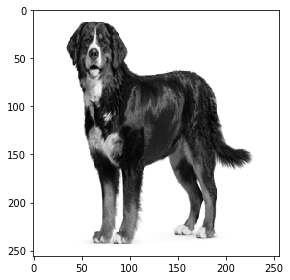

In [132]:
img=Image.open('Q2_train/Dogs/6.jpg')
# print(shape(img))
# io.imshow(np.asarray(img))
feat=preprocess(img)
# print(feat)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


[0.23717993306576785, 0.07554317046397736, 0.37400163109771606, 0.15047751454832517, 0.13335427386860776, 0.08794796154403575, 0.0, 0.0, 0.0, 0.23717993306576785, 0.07554317046397736, 0.37400163109771606, 0.15047751454832517, 0.13335427386860776, 0.08794796154403575, 0.0, 0.0, 0.0, 0.23717993306576785, 0.07554317046397736, 0.37400163109771606, 0.15047751454832517, 0.13335427386860776, 0.08794796154403575, 0.0, 0.0, 0.0, 0.23717993306576785, 0.07554317046397736, 0.37400163109771606, 0.15047751454832517, 0.13335427386860776, 0.08794796154403575, 0.0, 0.0, 0.0, 0.23624343395297503, 0.07539468249417397, 0.3581856117456645, 0.1257559780481723, 0.19459478238897865, 0.08078399566886267, 0.0, 0.0, 0.0, 0.23624343395297503, 0.07539468249417397, 0.3581856117456645, 0.1257559780481723, 0.19459478238897865, 0.08078399566886267, 0.0, 0.0, 0.0, 0.23624343395297503, 0.07539468249417397, 0.3581856117456645, 0.1257559780481723, 0.19459478238897865, 0.08078399566886267, 0.0, 0.0, 0.0, 0.2362434339529750

[0.20179304698128273, 0.016727191215916662, 0.36022733093340115, 0.127362133039117, 0.1991925077761199, 0.15276540585558165, 0.0, 0.0, 0.0, 0.20179304698128273, 0.016727191215916662, 0.36022733093340115, 0.127362133039117, 0.1991925077761199, 0.15276540585558165, 0.0, 0.0, 0.0, 0.20179304698128273, 0.016727191215916662, 0.36022733093340115, 0.127362133039117, 0.1991925077761199, 0.15276540585558165, 0.0, 0.0, 0.0, 0.20179304698128273, 0.016727191215916662, 0.36022733093340115, 0.127362133039117, 0.1991925077761199, 0.15276540585558165, 0.0, 0.0, 0.0, 0.23294894462698468, 0.017537519404975856, 0.28839663293919043, 0.08760188717860723, 0.2614120256216694, 0.1903792765580178, 0.0, 0.0, 0.0, 0.23294894462698468, 0.017537519404975856, 0.28839663293919043, 0.08760188717860723, 0.2614120256216694, 0.1903792765580178, 0.0, 0.0, 0.0, 0.23294894462698468, 0.017537519404975856, 0.28839663293919043, 0.08760188717860723, 0.2614120256216694, 0.1903792765580178, 0.0, 0.0, 0.0, 0.23294894462698468, 0.

[0.3039528762643551, 0.07462968611412474, 0.26981011915859743, 0.10085198651839732, 0.23055763215252795, 0.1261650253924157, 0.0, 0.0, 0.0, 0.3039528762643551, 0.07462968611412474, 0.26981011915859743, 0.10085198651839732, 0.23055763215252795, 0.1261650253924157, 0.0, 0.0, 0.0, 0.3039528762643551, 0.07462968611412474, 0.26981011915859743, 0.10085198651839732, 0.23055763215252795, 0.1261650253924157, 0.0, 0.0, 0.0, 0.3039528762643551, 0.07462968611412474, 0.26981011915859743, 0.10085198651839732, 0.23055763215252795, 0.1261650253924157, 0.0, 0.0, 0.0, 0.31177893020576863, 0.10855575194088787, 0.24056724404900479, 0.05058231074018628, 0.2489351290682226, 0.1364173003945321, 0.0, 0.0, 0.0, 0.31177893020576863, 0.10855575194088787, 0.24056724404900479, 0.05058231074018628, 0.2489351290682226, 0.1364173003945321, 0.0, 0.0, 0.0, 0.31177893020576863, 0.10855575194088787, 0.24056724404900479, 0.05058231074018628, 0.2489351290682226, 0.1364173003945321, 0.0, 0.0, 0.0, 0.31177893020576863, 0.108

[0.23065624482922728, 0.040362087474060795, 0.3489492630847503, 0.14620466793371753, 0.17484205065599015, 0.1464836605407753, 0.0, 0.0, 0.0, 0.23065624482922728, 0.040362087474060795, 0.3489492630847503, 0.14620466793371753, 0.17484205065599015, 0.1464836605407753, 0.0, 0.0, 0.0, 0.23065624482922728, 0.040362087474060795, 0.3489492630847503, 0.14620466793371753, 0.17484205065599015, 0.1464836605407753, 0.0, 0.0, 0.0, 0.23065624482922728, 0.040362087474060795, 0.3489492630847503, 0.14620466793371753, 0.17484205065599015, 0.1464836605407753, 0.0, 0.0, 0.0, 0.1390225862058537, 0.029698829139299485, 0.1701001975366019, 0.05638705373504399, 0.31532290308032096, 0.31344631092817066, 0.0, 0.0, 0.0, 0.1390225862058537, 0.029698829139299485, 0.1701001975366019, 0.05638705373504399, 0.31532290308032096, 0.31344631092817066, 0.0, 0.0, 0.0, 0.1390225862058537, 0.029698829139299485, 0.1701001975366019, 0.05638705373504399, 0.31532290308032096, 0.31344631092817066, 0.0, 0.0, 0.0, 0.1390225862058537,

[0.4270600033906615, 0.009550770395100924, 0.05455136914465506, 0.019954811490077305, 0.18342119605474916, 0.17467442500123648, 0.0, 0.0, 0.0, 0.4270600033906615, 0.009550770395100924, 0.05455136914465506, 0.019954811490077305, 0.18342119605474916, 0.17467442500123648, 0.0, 0.0, 0.0, 0.4270600033906615, 0.009550770395100924, 0.05455136914465506, 0.019954811490077305, 0.18342119605474916, 0.17467442500123648, 0.0, 0.0, 0.0, 0.4270600033906615, 0.009550770395100924, 0.05455136914465506, 0.019954811490077305, 0.18342119605474916, 0.17467442500123648, 0.0, 0.0, 0.0, 0.4623881186216735, 0.03322319200109709, 0.09442960608684152, 0.03225508435123411, 0.11314028346315645, 0.11106476739462809, 0.0, 0.0, 0.0, 0.4623881186216735, 0.03322319200109709, 0.09442960608684152, 0.03225508435123411, 0.11314028346315645, 0.11106476739462809, 0.0, 0.0, 0.0, 0.4623881186216735, 0.03322319200109709, 0.09442960608684152, 0.03225508435123411, 0.11314028346315645, 0.11106476739462809, 0.0, 0.0, 0.0, 0.462388118

[0.4917465290636805, 0.0001594850926105069, 0.08632407925416388, 0.021667565069761714, 0.01148903136031391, 0.01148903136031391, 0.0, 0.0, 0.0, 0.4917465290636805, 0.0001594850926105069, 0.08632407925416388, 0.021667565069761714, 0.01148903136031391, 0.01148903136031391, 0.0, 0.0, 0.0, 0.4917465290636805, 0.0001594850926105069, 0.08632407925416388, 0.021667565069761714, 0.01148903136031391, 0.01148903136031391, 0.0, 0.0, 0.0, 0.4917465290636805, 0.0001594850926105069, 0.08632407925416388, 0.021667565069761714, 0.01148903136031391, 0.01148903136031391, 0.0, 0.0, 0.0, 0.4933116756875703, 0.00024029207620000805, 0.07992381213490693, 0.015107673731309978, 0.003736350710600925, 0.0036762782347628193, 0.0, 0.0, 0.0, 0.4933116756875703, 0.00024029207620000805, 0.07992381213490693, 0.015107673731309978, 0.003736350710600925, 0.0036762782347628193, 0.0, 0.0, 0.0, 0.4933116756875703, 0.00024029207620000805, 0.07992381213490693, 0.015107673731309978, 0.003736350710600925, 0.0036762782347628193, 0

[0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.28438500499034103, 0.04490833507533328, 0.22574713564867713, 0.09947157790129285, 0.2532391337084606, 0.2052364184842409, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.05140292900565323, 0.24487606184936758, 0.08951663442130789, 0.23504879272288545, 0.1891302580840814, 0.0, 0.0, 0.0, 0.29725752454938675, 0.

[0.3216380709414409, 0.0565676829339678, 0.31347195161127184, 0.133708243288979, 0.13998375119664136, 0.08724127004499167, 0.0, 0.0, 0.0, 0.3216380709414409, 0.0565676829339678, 0.31347195161127184, 0.133708243288979, 0.13998375119664136, 0.08724127004499167, 0.0, 0.0, 0.0, 0.3216380709414409, 0.0565676829339678, 0.31347195161127184, 0.133708243288979, 0.13998375119664136, 0.08724127004499167, 0.0, 0.0, 0.0, 0.3216380709414409, 0.0565676829339678, 0.31347195161127184, 0.133708243288979, 0.13998375119664136, 0.08724127004499167, 0.0, 0.0, 0.0, 0.3237634380606708, 0.08940910688778489, 0.28610128637470417, 0.08935259149873229, 0.2020526954755174, 0.08074728700669048, 0.0, 0.0, 0.0, 0.3237634380606708, 0.08940910688778489, 0.28610128637470417, 0.08935259149873229, 0.2020526954755174, 0.08074728700669048, 0.0, 0.0, 0.0, 0.3237634380606708, 0.08940910688778489, 0.28610128637470417, 0.08935259149873229, 0.2020526954755174, 0.08074728700669048, 0.0, 0.0, 0.0, 0.3237634380606708, 0.089409106887

[0.18508609869305323, 0.00015514170023226025, 0.43705153039678074, 0.14446788007396175, 0.04395345094165719, 0.04388846724055036, 0.0, 0.0, 0.0, 0.18508609869305323, 0.00015514170023226025, 0.43705153039678074, 0.14446788007396175, 0.04395345094165719, 0.04388846724055036, 0.0, 0.0, 0.0, 0.18508609869305323, 0.00015514170023226025, 0.43705153039678074, 0.14446788007396175, 0.04395345094165719, 0.04388846724055036, 0.0, 0.0, 0.0, 0.18508609869305323, 0.00015514170023226025, 0.43705153039678074, 0.14446788007396175, 0.04395345094165719, 0.04388846724055036, 0.0, 0.0, 0.0, 0.1338486319907006, 0.0018510985502261088, 0.45190383172688675, 0.13866157167285634, 0.06593925117028492, 0.06549066891739898, 0.0, 0.0, 0.0, 0.1338486319907006, 0.0018510985502261088, 0.45190383172688675, 0.13866157167285634, 0.06593925117028492, 0.06549066891739898, 0.0, 0.0, 0.0, 0.1338486319907006, 0.0018510985502261088, 0.45190383172688675, 0.13866157167285634, 0.06593925117028492, 0.06549066891739898, 0.0, 0.0, 0.

[0.19616681397957678, 0.005492028668972215, 0.11011540314501075, 0.036568975641961494, 0.3269852615329702, 0.3018383101349557, 0.0, 0.0, 0.0, 0.19616681397957678, 0.005492028668972215, 0.11011540314501075, 0.036568975641961494, 0.3269852615329702, 0.3018383101349557, 0.0, 0.0, 0.0, 0.19616681397957678, 0.005492028668972215, 0.11011540314501075, 0.036568975641961494, 0.3269852615329702, 0.3018383101349557, 0.0, 0.0, 0.0, 0.19616681397957678, 0.005492028668972215, 0.11011540314501075, 0.036568975641961494, 0.3269852615329702, 0.3018383101349557, 0.0, 0.0, 0.0, 0.18257596322205455, 0.0, 0.13289446987364645, 0.044540123100242905, 0.3138640270600923, 0.3138640270600923, 0.0, 0.0, 0.0, 0.18257596322205455, 0.0, 0.13289446987364645, 0.044540123100242905, 0.3138640270600923, 0.3138640270600923, 0.0, 0.0, 0.0, 0.18257596322205455, 0.0, 0.13289446987364645, 0.044540123100242905, 0.3138640270600923, 0.3138640270600923, 0.0, 0.0, 0.0, 0.18257596322205455, 0.0, 0.13289446987364645, 0.04454012310024

[0.04005619063819046, 0.0022797552872664433, 0.18896003233052713, 0.0950684027063395, 0.3227977754816261, 0.3153537782237788, 0.0, 0.0, 0.0, 0.04005619063819046, 0.0022797552872664433, 0.18896003233052713, 0.0950684027063395, 0.3227977754816261, 0.3153537782237788, 0.0, 0.0, 0.0, 0.04005619063819046, 0.0022797552872664433, 0.18896003233052713, 0.0950684027063395, 0.3227977754816261, 0.3153537782237788, 0.0, 0.0, 0.0, 0.04005619063819046, 0.0022797552872664433, 0.18896003233052713, 0.0950684027063395, 0.3227977754816261, 0.3153537782237788, 0.0, 0.0, 0.0, 0.040742482857230616, 0.001259803464847511, 0.15153192952654673, 0.04772819869366966, 0.3373979838933967, 0.33054675438423037, 0.0, 0.0, 0.0, 0.040742482857230616, 0.001259803464847511, 0.15153192952654673, 0.04772819869366966, 0.3373979838933967, 0.33054675438423037, 0.0, 0.0, 0.0, 0.040742482857230616, 0.001259803464847511, 0.15153192952654673, 0.04772819869366966, 0.3373979838933967, 0.33054675438423037, 0.0, 0.0, 0.0, 0.04074248285

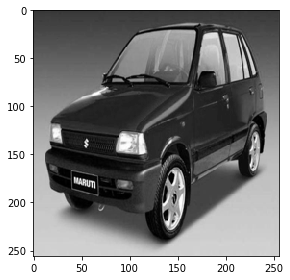

In [134]:
cars=[]
for i in range(1,12):
    name=str(i)+'.jpg'
    img=Image.open('Q2_train/Car/'+name)
    feat=preprocess(img)
    print(feat)
    cars.append(feat)

In [135]:
import pandas as pd


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


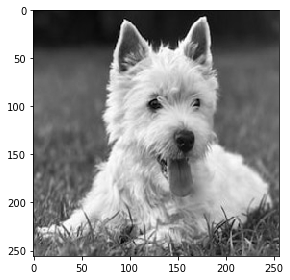

In [136]:
dogs=[]
for i in range(1,9):
    name=str(i)+'.jpg'
    img=Image.open('Q2_train/Dogs/'+name)
    dogs.append(preprocess(img))

In [137]:
shape(cars)

(11, 8100)

In [138]:
shape(dogs)

(8, 8100)

In [139]:
data={}
features=[]
label=[]
for ind in range(len(cars)):
    i=cars[ind]
    features.append(np.asarray(i))
    label.append(0)
for ind in range(len(dogs)):
    i=dogs[ind]
    features.append(np.asarray(i))
    label.append(1)

In [140]:
label

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [141]:
data['Feature']=features
data['label']=label

In [ ]:
np

In [142]:
dataframe=pd.DataFrame(data)

In [143]:
dataframe

Feature  label
0   [0.23717993306576785, 0.07554317046397736, 0.3...      0
1   [0.20179304698128273, 0.016727191215916662, 0....      0
2   [0.3039528762643551, 0.07462968611412474, 0.26...      0
3   [0.23065624482922728, 0.040362087474060795, 0....      0
4   [0.4270600033906615, 0.009550770395100924, 0.0...      0
5   [0.4917465290636805, 0.0001594850926105069, 0....      0
6   [0.28438500499034103, 0.04490833507533328, 0.2...      0
7   [0.3216380709414409, 0.0565676829339678, 0.313...      0
8   [0.18508609869305323, 0.00015514170023226025, ...      0
9   [0.19616681397957678, 0.005492028668972215, 0....      0
10  [0.04005619063819046, 0.0022797552872664433, 0...      0
11  [0.4688519498375261, 0.024178519879132998, 0.0...      1
12  [0.10602567058128567, 0.02605666187042868, 0.4...      1
13  [0.03701184142942839, 0.006355079350622539, 0....      1
14  [0.3965436711998416, 0.026527481598269384, 0.2...      1
15  [0.34341103432594317, 0.03945220656831561, 0.1...      1
16  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1
17  [0.49316505593360194, 0.03875692997218719, 0.0...      1
18  [0.20481192922063557, 0.003713062104180947, 0....      1

### Training KNN model with the feature vector of each image

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [159]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['Feature'], dataframe['label'], test_size=0.30, random_state=101)

In [207]:
X_train

12    [0.10602567058128567, 0.02605666187042868, 0.4...
5     [0.4917465290636805, 0.0001594850926105069, 0....
10    [0.04005619063819046, 0.0022797552872664433, 0...
4     [0.4270600033906615, 0.009550770395100924, 0.0...
8     [0.18508609869305323, 0.00015514170023226025, ...
9     [0.19616681397957678, 0.005492028668972215, 0....
18    [0.20481192922063557, 0.003713062104180947, 0....
13    [0.03701184142942839, 0.006355079350622539, 0....
7     [0.3216380709414409, 0.0565676829339678, 0.313...
15    [0.34341103432594317, 0.03945220656831561, 0.1...
6     [0.28438500499034103, 0.04490833507533328, 0.2...
17    [0.49316505593360194, 0.03875692997218719, 0.0...
11    [0.4688519498375261, 0.024178519879132998, 0.0...
Name: Feature, dtype: object

In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn = KNeighborsClassifier(n_neighbors=1)

In [226]:
knn.fit(list(X_train),y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Testing on the test split(all predicted correctly)

In [227]:
predictKnn=knn.predict(list(X_test))

In [228]:
print(classification_report(y_test,predictKnn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [229]:
print(confusion_matrix(y_test,predictKnn))

[[4 0]
 [0 2]]


In [230]:
print(predictKnn,'\n',y_test)

[0 1 0 0 0 1] 
 3     0
14    1
1     0
2     0
0     0
16    1
Name: label, dtype: int64


### Testing with all the test Images(1 car predicted wrong)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.23893858557245695, 0.0539

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.41607157868775246, 0.05857579289745368, 0.0013110104043300176, 0.003960853970710131, 0.20869950000903648, 0.17285956577012643, 0.0, 0.0, 0.0, 0.41607157868775246, 0.05857579289745368, 0.0013110104043300176, 0.003960853970710131, 0.20869950000903648, 0.17285956577012643, 0.0, 0.0, 0.0, 0.41607157868775246, 0.05857579289745368, 0.0013110104043300176, 0.003960853970710131, 0.20869950000903648, 0.17285956577012643, 0.0, 0.0, 0.0, 0.41607157868775246, 0.05857579289745368, 0.0013110104043300176, 0.003960853970710131, 0.20869950000903648, 0.17285956577012643, 0.0, 0.0, 0.0, 0.25856519561216706, 0.014982471366234774, 0.351902338091656, 0.16699901197976352, 0.13699489193599967, 0.11148111587463658, 0.0, 0.0, 0.0, 0.25856519561216706, 0.014982471366234774, 0.351902338091656, 0.166

[0.49693648173961436, 0.029350243194347012, 0.014237897334762231, 0.007765992326857482, 0.03948677231951169, 0.01924741008909049, 0.0, 0.0, 0.0, 0.49693648173961436, 0.029350243194347012, 0.014237897334762231, 0.007765992326857482, 0.03948677231951169, 0.01924741008909049, 0.0, 0.0, 0.0, 0.49693648173961436, 0.029350243194347012, 0.014237897334762231, 0.007765992326857482, 0.03948677231951169, 0.01924741008909049, 0.0, 0.0, 0.0, 0.49693648173961436, 0.029350243194347012, 0.014237897334762231, 0.007765992326857482, 0.03948677231951169, 0.01924741008909049, 0.0, 0.0, 0.0, 0.46429322033748593, 0.013381012005940177, 0.05509563171861092, 0.0183552947423768, 0.12621677596505324, 0.12226869612365587, 0.0, 0.0, 0.0, 0.46429322033748593, 0.013381012005940177, 0.05509563171861092, 0.0183552947423768, 0.12621677596505324, 0.12226869612365587, 0.0, 0.0, 0.0, 0.46429322033748593, 0.013381012005940177, 0.05509563171861092, 0.0183552947423768, 0.12621677596505324, 0.12226869612365587, 0.0, 0.0, 0.0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0.14646120081208291, 0.03160809422861776, 0.3496259451675809, 0.15172841814848603, 0.24007742514113734, 0.15701293120425777, 0.0, 0.0, 0.0, 0.14646120081208291, 0.03160809422861776, 0.3496259451675809, 0.15172841814848603, 0.24007742514113734, 0.15701293120425777, 0.0, 0.0, 0.0, 0.14646120081208291, 0.03160809422861776, 0.3496259451675809, 0.15172841814848603, 0.24007742514113734, 0.15701293120425777, 0.0, 0.0, 0.0, 0.14646120081208291, 0.03160809422861776, 0.3496259451675809, 0.15172841814848603, 0.24007742514113734, 0.15701293120425777, 0.0, 0.0, 0.0, 0.1698198503285751, 0.038635661337541136, 0.4170787782697525, 0.13937166657042016, 0.12664681675602998, 0.101241884550565, 0.0, 0.0, 0.0, 0.1698198503285751, 0.038635661337541136, 0.4170787782697525, 0.13937166657042016, 0.12664681675602998, 0.101241884550565, 0.0, 0.0, 0.0, 0.1698198503285751, 0.038635661337541136, 0.4170787782697525, 0.13937166657042016, 0.12664681675602998, 0.101241884550565, 0.0, 0.0, 0.0, 0.1698198503285751, 0.038

[0.3697085372041844, 0.002448653196994698, 0.13111159136002729, 0.04409368915232574, 0.21911712698618188, 0.21485526166506547, 0.0, 0.0, 0.0, 0.3697085372041844, 0.002448653196994698, 0.13111159136002729, 0.04409368915232574, 0.21911712698618188, 0.21485526166506547, 0.0, 0.0, 0.0, 0.3697085372041844, 0.002448653196994698, 0.13111159136002729, 0.04409368915232574, 0.21911712698618188, 0.21485526166506547, 0.0, 0.0, 0.0, 0.3697085372041844, 0.002448653196994698, 0.13111159136002729, 0.04409368915232574, 0.21911712698618188, 0.21485526166506547, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.31365886047868974, 0.001175926056027939, 0.11145574636872801, 0.03715191545624267, 0.26367480466655835, 0.26132295269358724, 0.0, 0.0, 0.0, 0.31365886047868974, 0.001175926056027939, 0.11145574636872801, 0.03715191545

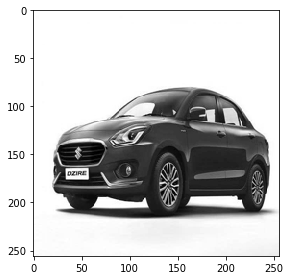

In [231]:
testFeatures=[]
for i in range(1,7):
    name=str(i)+'.jpg'
    img=Image.open('Q2_test/'+name)
#     io.imshow(np.asarray(img))
    feat=preprocess(img)
    print(feat)
    testFeatures.append(np.asarray(feat))

In [232]:
ans=knn.predict(list(testFeatures))

In [233]:
ans

array([1, 1, 1, 0, 0, 1])

### Testing an image

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


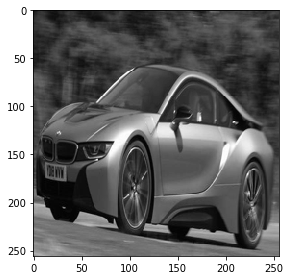

In [238]:
testImg=Image.open('car2.jpg')
featureOfTestImage=preprocess(testImg)
l=[]
l.append(featureOfTestImage)

In [239]:
featureOfTestImage

[0.23055932905664492,
 0.017338691341938536,
 0.3404841186184148,
 0.11990974916372392,
 0.20349811159975,
 0.15755158255939042,
 0.0,
 0.0,
 0.0,
 0.23055932905664492,
 0.017338691341938536,
 0.3404841186184148,
 0.11990974916372392,
 0.20349811159975,
 0.15755158255939042,
 0.0,
 0.0,
 0.0,
 0.23055932905664492,
 0.017338691341938536,
 0.3404841186184148,
 0.11990974916372392,
 0.20349811159975,
 0.15755158255939042,
 0.0,
 0.0,
 0.0,
 0.23055932905664492,
 0.017338691341938536,
 0.3404841186184148,
 0.11990974916372392,
 0.20349811159975,
 0.15755158255939042,
 0.0,
 0.0,
 0.0,
 0.23045185319174538,
 0.01755305859564622,
 0.2905802745780557,
 0.08867072496594026,
 0.26144069086076827,
 0.1895605581781942,
 0.0,
 0.0,
 0.0,
 0.23045185319174538,
 0.01755305859564622,
 0.2905802745780557,
 0.08867072496594026,
 0.26144069086076827,
 0.1895605581781942,
 0.0,
 0.0,
 0.0,
 0.23045185319174538,
 0.01755305859564622,
 0.2905802745780557,
 0.08867072496594026,
 0.26144069086076827,
 0.1895

In [240]:
predTest=knn.predict(l)

In [241]:
predTest

array([0])